<a href="https://colab.research.google.com/github/bhaskarvenna/MachineLearning_InDepth/blob/main/LinearRegressions_indepth_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("Jsglp")

Jsglp
Jsglp


In [3]:
#https://github.com/ageron/handson-ml3
#https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [5]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

The following cell is not shown either in the book. It creates the images/end_to_end_project folder (if it doesn't already exist), and it defines the save_fig() function which is used through this notebook to save the figures in high-res for the book

In [9]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

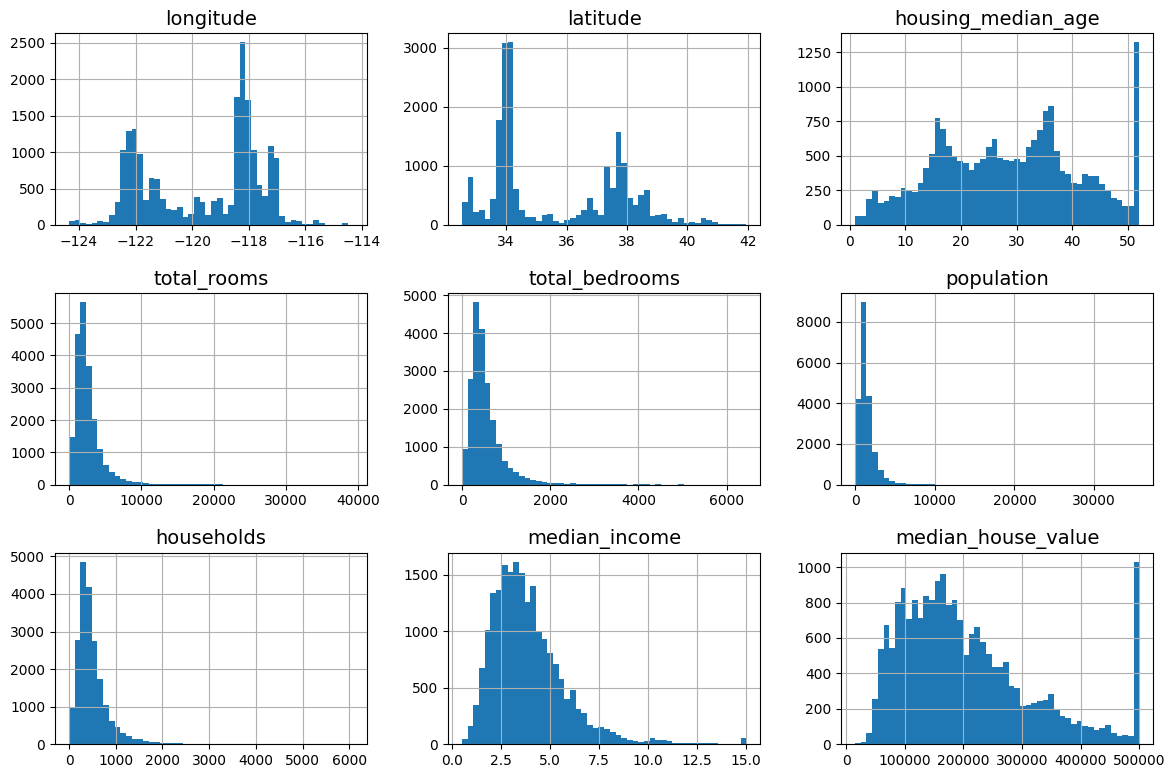

In [10]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

# **Create a Test Data**

In [11]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [13]:
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
train_set.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5712     -118.43     34.18                25.0       3830.0          1105.0   
8716     -118.35     34.08                52.0       1801.0           313.0   
3276     -122.32     37.99                24.0       4865.0           968.0   
15358    -119.72     34.43                33.0       1028.0           377.0   
12462    -118.27     34.15                14.0       1744.0           536.0   

       population  households  median_income  median_house_value  \
5712       2328.0      1017.0         2.6238            210000.0   
8716        714.0       293.0         4.6838            479000.0   
3276       2315.0       893.0         4.2852            173500.0   
15358       753.0       356.0         2.3454            243800.0   
12462      1494.0       531.0         3.2171            230800.0   

      ocean_proximity  
5712        <1H OCEAN  
8716        <1H OCEAN  
3276         NEAR BAY  
15358       <1H OCEAN  
12462       <1H OCEAN

In [16]:
test_set.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17615    -122.23     37.76                52.0       1705.0           246.0   
16281    -120.76     38.60                14.0       2925.0           625.0   
8214     -122.35     37.96                35.0       1326.0           346.0   
2030     -122.24     37.80                52.0        996.0           228.0   
6196     -118.09     33.93                37.0       1950.0           356.0   

       population  households  median_income  median_house_value  \
17615       658.0       253.0         5.7500            306300.0   
16281      1226.0       437.0         2.5865            133800.0   
8214       1023.0       295.0         2.0724             97700.0   
2030        731.0       228.0         2.2697            127000.0   
6196       1183.0       338.0         4.1449            175300.0   

      ocean_proximity  
17615        NEAR BAY  
16281          INLAND  
8214         NEAR BAY  
2030         NEAR BAY  
6196        <1H OCEAN

**Above aproach have lot of limitation**

**Problem**: Running the program multiple times generates different test sets, potentially exposing the entire dataset to algorithms over time, which is undesirable.


**Basic Solutions:** Save the test set on the first run and load it in future runs.
Set a fixed random seed (e.g., np.random.seed(42)) to ensure consistent shuffling.

**Limitation:** These approaches fail when the dataset is updated.


**Robust Solution:** Use each instance's unique identifier to determine test set membership. Compute a hash of the identifier and include the instance in the test set if the hash value is below a threshold (e.g., 20% of the maximum hash value). This ensures:
The test set remains stable across runs.
The updated test set contains 20% of new instances without including prior test instances.


Here is a possible implementation:

In [17]:
#we are leveraging ID if there is one in the dataset, otehrwise we will have to create our own id using natural key data
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
 return crc32(np.int64(identifier)) < test_ratio * 2**32
def split_data_with_id_hash(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
 return data.loc[~in_test_set], data.loc[in_test_set]

Unfortunately, the housing dataset does not have an identifier column. The simplest
solution is to use the row index as the ID:

In [18]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [19]:
train_set.head(5)

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   
6      6    -122.25     37.84                52.0       2535.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   
6           489.0      1094.0       514.0         3.6591            299200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY  
6        NEAR BAY

Creating our own ID Column

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [21]:
train_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity         id  
0        NEAR BAY -122192.12  
1        NEAR BAY -122182.14  
2        NEAR BAY -122202.15  
3        NEAR BAY -122212.15  
4        NEAR BAY -122212.15

In [22]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Scikit-Learn provides a few functions to split datasets into multiple subsets in various
ways. The simplest function is train_test_split(), which does pretty much the
same thing as the shuffle_and_split_data() function we defined earlier, with a
couple of additional features. First, there is a random_state parameter that allows
you to set the random generator seed. Second, you can pass it multiple datasets with
an identical number of rows, and it will split them on the same indices (this is very
useful, for example, if you have a separate DataFrame for labels):

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [24]:
train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.22     32.75                34.0       6001.0          1111.0   
8267     -117.03     32.69                10.0        901.0           163.0   
17445    -122.27     37.74                28.0       6909.0          1554.0   
14265    -121.82     37.25                25.0       4021.0           634.0   
2271     -115.98     33.32                 8.0        240.0            46.0   

       population  households  median_income  median_house_value  \
14196      2654.0      1072.0         4.5878            291000.0   
8267        698.0       167.0         4.6648            156100.0   
17445      2974.0      1484.0         3.6875            353900.0   
14265      2178.0       650.0         5.1663            241200.0   
2271         63.0        24.0         1.4688             53800.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445        NEAR BAY  
14265       <1H OCEAN  
2271           INLAND

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The cdf() (Cumulative Distribution Function) method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [25]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


If you prefer simulations over maths, here's how you could get roughly the same result:

In [26]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

So far we have considered purely random sampling methods. This is generally fine if
your dataset is large enough (especially relative to the number of attributes), but if it
is not, you run the risk of introducing a significant sampling bias. When employees
at a survey company decides to call 1,000 people to ask them a few questions, they
don’t just pick 1,000 people randomly in a phone book. They try to ensure that
these 1,000 people are representative of the whole population, with regard to the
questions they want to ask. For example, the US population is 51.1% females and
Get the Data | 57
48.9% males, so a well-conducted survey in the US would try to maintain this ratio in
the sample: 511 females and 489 males (at least if it seems possible that the answers
may vary across genders). This is called stratified sampling: the population is divided
into homogeneous subgroups called strata, and the right number of instances are
sampled from each stratum to guarantee that the test set is representative of the
overall population. If the people running the survey used purely random sampling,
there would be about a 10.7% chance of sampling a skewed test set with less than
48.5% female or more than 53.5% female participants. Either way, the survey results
would likely be quite biased.
Suppose you’ve chatted with some experts who told you that the median income is a
very important attribute to predict median housing prices. You may want to ensure
that the test set is representative of the various categories of incomes in the whole
dataset. Since the median income is a continuous numerical attribute, you first need
to create an income category attribute. Let’s look at the median income histogram
more closely (back in Figure 2-8): most median income values are clustered around
1.5 to 6 (i.e., $15,000–$60,000), but some median incomes go far beyond 6. It is
important to have a sufficient number of instances in your dataset for each stratum,
or else the estimate of a stratum’s importance may be biased. This means that you
should not have too many strata, and each stratum should be large enough. The
following code uses the pd.cut() function to create an income category attribute
with five categories (labeled from 1 to 5); category 1 ranges from 0 to 1.5 (i.e., less
than $15,000), category 2 from 1.5 to 3, and so on:


In [27]:
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

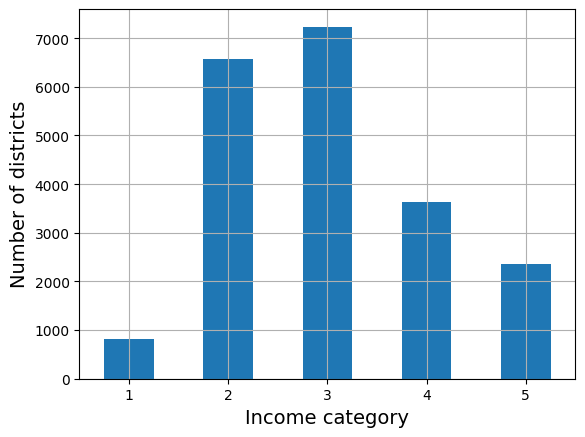

In [28]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Now you are ready to do stratified sampling based on the income category. ScikitLearn provides a number of splitter classes in the sklearn.model_selection package
that implement various strategies to split your dataset into a training set and a test set.
Each splitter has a split() method that returns an iterator over different training/
test splits of the same data.

To be precise, the split() method yields the training and test indices, not the
data itself. Having multiple splits can be useful if you want to better estimate the
performance of your model, as you will see when we discuss cross-validation later in
this chapter. For example, the following code generates 10 different stratified splits of
the same dataset:

In [29]:
#strat_splits: A list containing 10 pairs of stratified train and test sets, where each split preserves
#the income category distribution.

from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
 strat_train_set_n = housing.iloc[train_index]
 strat_test_set_n = housing.iloc[test_index]
 strat_splits.append([strat_train_set_n, strat_test_set_n])

In [30]:
strat_splits[0]

[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 13096    -122.42     37.80                52.0       3321.0          1115.0   
 14973    -118.38     34.14                40.0       1965.0           354.0   
 3785     -121.98     38.36                33.0       1083.0           217.0   
 14689    -117.11     33.75                17.0       4174.0           851.0   
 20507    -118.15     33.77                36.0       4366.0          1211.0   
 ...          ...       ...                 ...          ...             ...   
 14207    -118.40     33.86                41.0       2237.0           597.0   
 13105    -119.31     36.32                23.0       2945.0           592.0   
 19301    -117.06     32.59                13.0       3920.0           775.0   
 19121    -118.40     34.06                37.0       3781.0           873.0   
 19888    -122.41     37.66                44.0        431.0           195.0   
 
        population  households  median

It's much shorter to get a single stratified split:

In [31]:
strat_train_set, strat_test_set = strat_splits[0]

In [32]:
strat_train_set.head(4)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   

      ocean_proximity income_cat  
13096        NEAR BAY          2  
14973       <1H OCEAN          5  
3785           INLAND          2  
14689          INLAND          2

In [33]:
strat_test_set.head(4)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3905     -121.95     37.11                21.0       2387.0           357.0   
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   

       population  households  median_income  median_house_value  \
3905        913.0       341.0         7.7360            397700.0   
16821       804.0       272.0         4.6354            202900.0   
2900       2136.0      1503.0         4.0968            310000.0   
7193       1072.0       370.0         4.1310            314300.0   

      ocean_proximity income_cat  
3905        <1H OCEAN          5  
16821       <1H OCEAN          4  
2900       NEAR OCEAN          3  
7193       NEAR OCEAN          3

It's much shorter to get a single stratified split:


In [34]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [35]:
strat_train_set.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   

      ocean_proximity income_cat  
13096        NEAR BAY          2  
14973       <1H OCEAN          5  
3785           INLAND          2  
14689          INLAND          2  
20507      NEAR OCEAN          3

In [36]:
strat_test_set["income_cat"].value_counts()

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

In [37]:
len(strat_test_set)

4128

In [38]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

With similar code you can measure the income category proportions in the full data‐
set. Below Figure compares the income category proportions in the overall dataset, in
the test set generated with stratified sampling, and in a test set generated using purely
random sampling. As you can see, the test set generated using stratified sampling has
income category proportions almost identical to those in the full dataset, whereas the
test set generated using purely random sampling is skewed.

In [39]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

Overall %  Stratified %  Random %  Strat. Error %  \
Income Category                                                      
1                     3.98          4.00      4.24            0.36   
2                    31.88         31.88     30.74           -0.02   
3                    35.06         35.05     34.52           -0.01   
4                    17.63         17.64     18.41            0.03   
5                    11.44         11.43     12.09           -0.08   

                 Rand. Error %  
Income Category                 
1                         6.45  
2                        -3.59  
3                        -1.53  
4                         4.42  
5                         5.63

You won’t use the income_cat column again, so you might as well drop it, reverting
the data back to its original state:

In [40]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

## Explore and Visualize the Data to Gain Insights

So far you have only taken a quick glance at the data to get a general understanding of
the kind of data you are manipulating. Now the goal is to go into a little more depth.
First, make sure you have put the test set aside and you are only exploring the train‐
ing set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast during the exploration phase. In this case,
the training set is quite small, so you can just work directly on the full set. Since
you’re going to experiment with various transformations of the full training set, you
should make a copy of the original so you can revert to it afterwards:

In [41]:
housing = strat_train_set.copy()

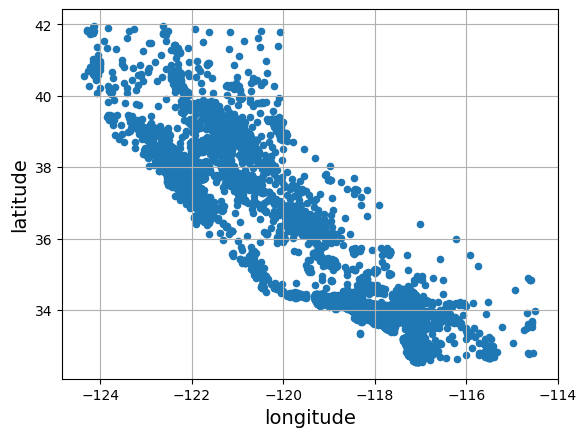

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

This looks like California all right, but other than that it is hard to see any particular
pattern.

So Setting the alpha option to 0.2 makes it much easier to visualize the places
where there is a high density of data points below figure

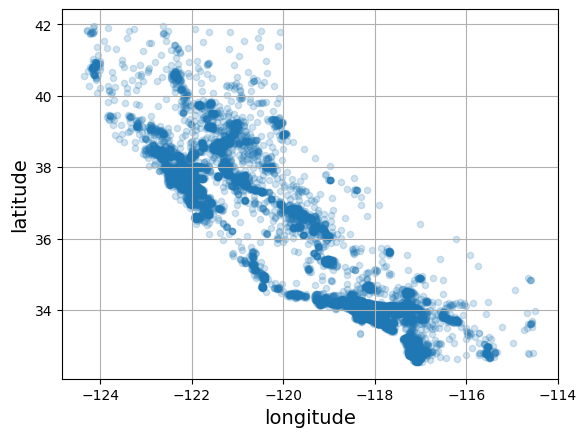

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

Next, you look at the housing prices below figure. The radius of each circle repre‐
sents the district’s population (option s), and the color represents the price (option
c). Here you use a predefined color map (option cmap) called jet, which ranges from
blue (low values) to red (high prices):

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.
A clustering algorithm should be useful for detecting the main cluster and for adding
new features that measure the proximity to the cluster centers. The ocean proximity
attribute may be useful as well, although in Northern California the housing prices in
coastal districts are not too high, so it is not a simple rule

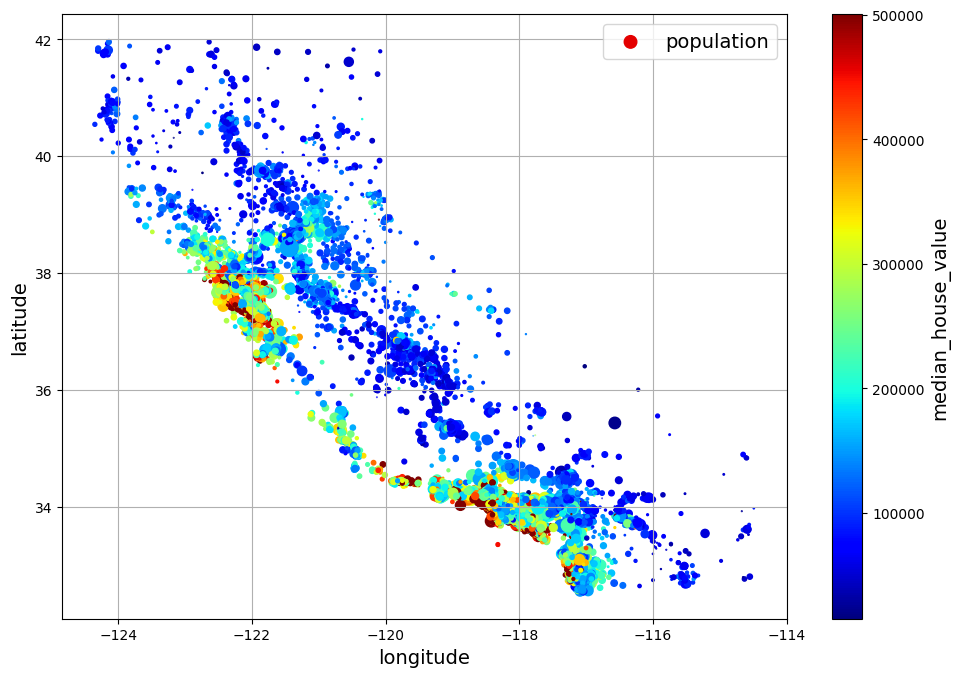

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

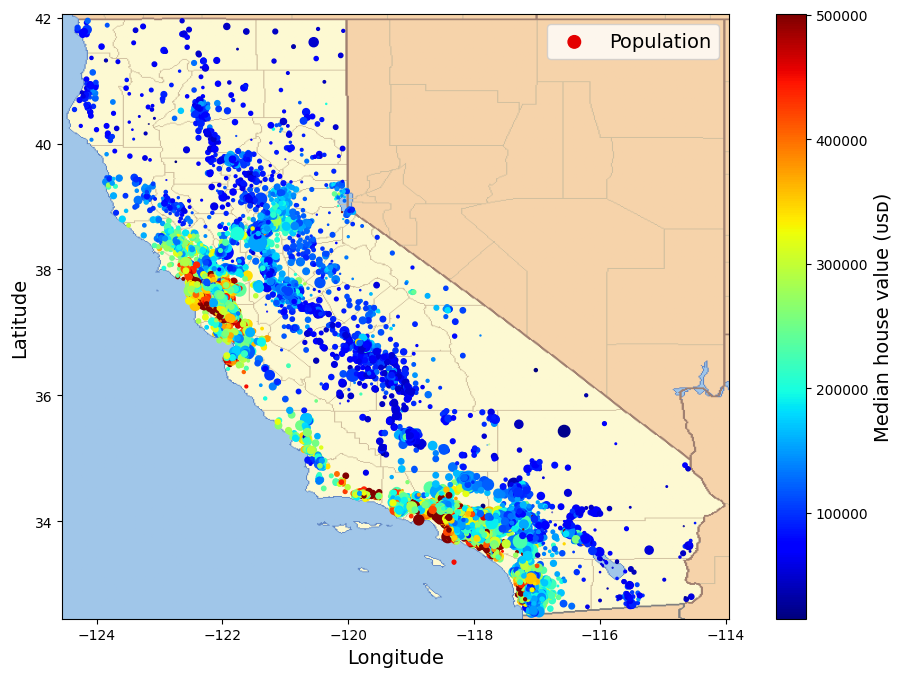

In [45]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

# Look for Correlations

since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method:

In [46]:
corr_matrix = housing.corr(numeric_only=True)

In [47]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to
go up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency
to go down when you go north). Finally, coefficients close to 0 mean that there is no
linear correlation.
Another way to check for correlation between attributes is to use the Pandas
scatter_matrix() function, which plots every numerical attribute against every
other numerical attribute. Since there are now 11 numerical attributes, you would
get 112
 = 121 plots, which would not fit on a page—so you decide to focus on a
few promising attributes that seem most correlated with the median housing value

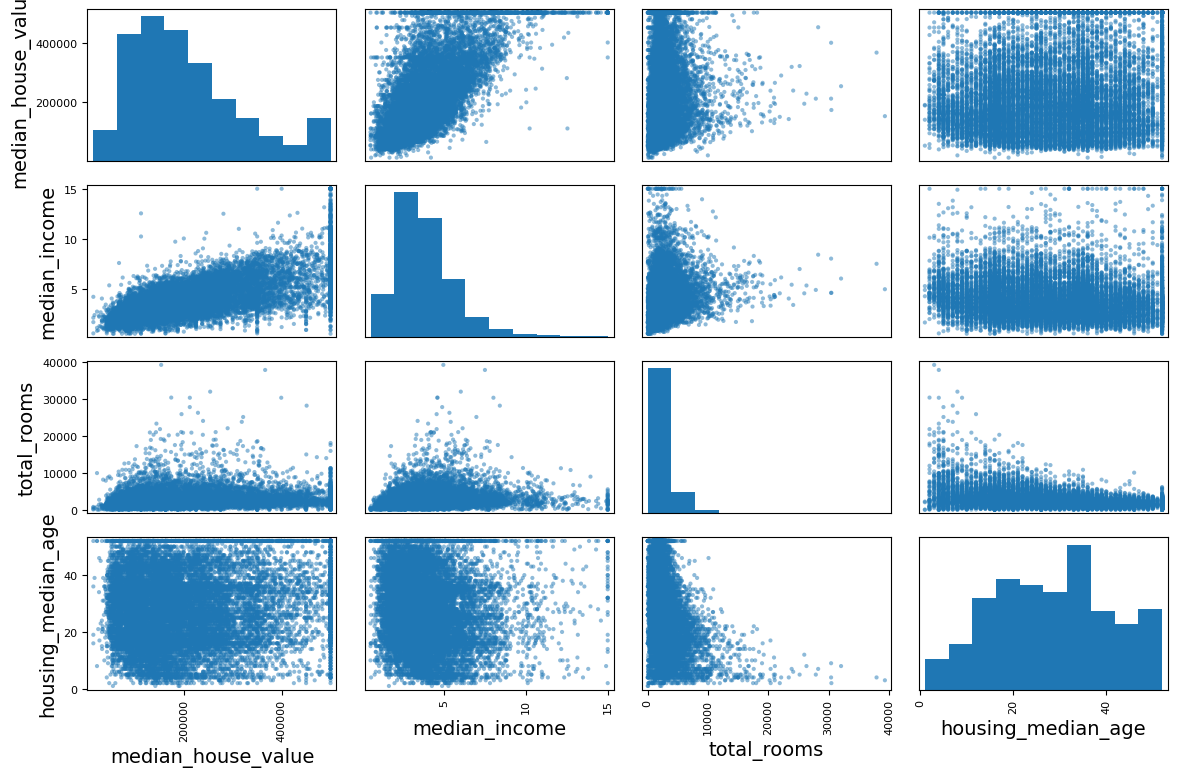

In [48]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

Below plot reveals a few things. First, the correlation is indeed quite strong; you can
clearly see the upward trend, and the points are not too dispersed. Second, the price
cap you noticed earlier is clearly visible as a horizontal line at $500,000.

But the
plot also reveals other less obvious straight lines: a horizontal line around $450,000,

another around $350,000,

perhaps one around $280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

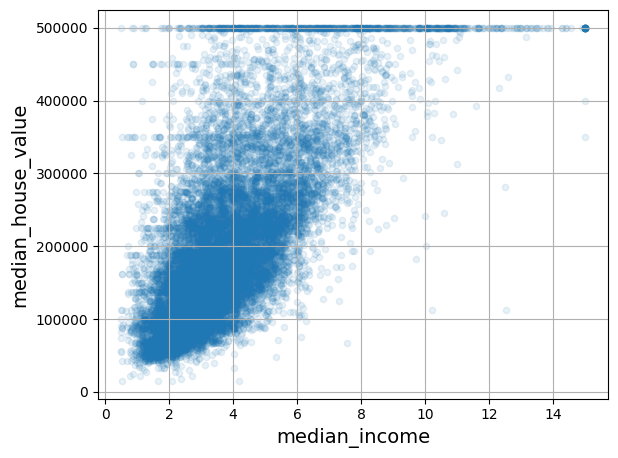

In [49]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

# Experiment with Attribute Combinations

In [50]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [51]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   

      ocean_proximity  rooms_per_house  bedrooms_ratio  people_per_house  
13096        NEAR BAY         3.211799        0.335742          1.524178  
14973       <1H OCEAN         5.504202        0.180153          1.865546  
3785           INLAND         5.334975        0.200369          2.768473  
14689          INLAND         5.351282        0.203881          2.365385  
20507      NEAR OCEAN         3.725256        0.277371          1.631399

below, not bad! The new bedrooms_ratio attribute is much more correlated with the
median house value than the total number of rooms or bedrooms. Apparently houses
with a lower bedroom/room ratio tend to be more expensive. The number of rooms
per household is also more informative than the total number of rooms in a district—
obviously the larger the houses, the more expensive they are.
This round of exploration does not have to be absolutely thorough; the point is to
start off on the right foot and quickly gain insights that will help you get a first
reasonably good prototype. But this is an iterative process: once you get a prototype
up and running, you can analyze its output to gain more insights and come back to
this exploration step.

In [52]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms


Let's revert to the original training set and separate the target (note that strat_train_set.drop() creates a copy of strat_train_set without the column, it doesn't actually modify strat_train_set itself, unless you pass inplace=True)

In [53]:
housing = strat_train_set.drop("median_house_value", axis=1)
#note that strat_train_set.drop() creates a copy of strat_train_set without the column

housing_labels = strat_train_set["median_house_value"].copy()

In [54]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income ocean_proximity  
13096      1576.0      1034.0         2.0987        NEAR BAY  
14973       666.0       357.0         6.0876       <1H OCEAN  
3785        562.0       203.0         2.4330          INLAND  
14689      1845.0       780.0         2.2618          INLAND  
20507      1912.0      1172.0         3.5292      NEAR OCEAN

In [55]:
housing_labels.head()

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

# Clean the Data

Most machine learning algorithms cannot work with missing features, so you’ll need
to take care of these. For example, you noticed earlier that the total_bedrooms
attribute has some missing values. You have three options to fix this:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the missing values to some value (zero, the mean, the median, etc.). This is
called imputation.
You can accomplish these easily using the Pandas DataFrame’s dropna(), drop(), and
fillna() methods:

n the book 3 options are listed to handle the NaN values:

housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
For each option, we'll create a copy of housing and work on that copy to avoid breaking housing. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [56]:

null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0             NaN   
18217    -117.96     34.03                35.0       2093.0             NaN   
11889    -118.05     34.04                33.0       1348.0             NaN   
20325    -118.88     34.17                15.0       4260.0             NaN   
14360    -117.87     33.62                 8.0       1266.0             NaN   

       population  households  median_income ocean_proximity  
14452      2503.0       902.0         3.5962          INLAND  
18217      1755.0       403.0         3.4115       <1H OCEAN  
11889      1098.0       257.0         4.2917       <1H OCEAN  
20325      1701.0       669.0         5.1033       <1H OCEAN  
14360       375.0       183.0         9.8020       <1H OCEAN

Option1: Handle Null values by removing those rows

In [57]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

housing_option1.loc[null_rows_idx].head()

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

Option2: Handle Null values by removing those Columns

In [58]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  population  \
14452    -120.67     40.50                15.0       5343.0      2503.0   
18217    -117.96     34.03                35.0       2093.0      1755.0   
11889    -118.05     34.04                33.0       1348.0      1098.0   
20325    -118.88     34.17                15.0       4260.0      1701.0   
14360    -117.87     33.62                 8.0       1266.0       375.0   

       households  median_income ocean_proximity  
14452       902.0         3.5962          INLAND  
18217       403.0         3.4115       <1H OCEAN  
11889       257.0         4.2917       <1H OCEAN  
20325       669.0         5.1033       <1H OCEAN  
14360       183.0         9.8020       <1H OCEAN

Option3: Handle Null values by replacing nulls with some values , like mean, median etc..

In [59]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()

<ipython-input-59-b6dffbe9d505>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0           434.0   
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income ocean_proximity  
14452      2503.0       902.0         3.5962          INLAND  
18217      1755.0       403.0         3.4115       <1H OCEAN  
11889      1098.0       257.0         4.2917       <1H OCEAN  
20325      1701.0       669.0         5.1033       <1H OCEAN  
14360       375.0       183.0         9.8020       <1H OCEAN

You decide to go for option 3 since it is the least destructive, but instead of the
preceding code, you will use a handy Scikit-Learn class: **SimpleImputer** (Impute means replace missing data). The benefit
is that it will store the median value of each feature: this will make it possible to
impute missing values not only on the training set, but also on the validation set,
the test set, and any new data fed to the model. To use it, first you need to create a
SimpleImputer instance, specifying that you want to replace each attribute’s missing
values with the median of that attribute:

In [60]:
#impute meaning , fill the missing values which is imputer does
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you then need to
create a copy of the data with only the numerical attributes (this will exclude the text
attribute ocean_proximity):

In [61]:
housing_num = housing.select_dtypes(include=[np.number])

In [62]:
housing_num.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
1286     -121.31     37.96                52.0       1829.0           301.0   
18078    -118.36     33.85                34.0       1086.0           197.0   
4396     -122.13     37.41                36.0       4787.0           900.0   
18031    -118.44     34.31                22.0       3182.0           822.0   
6753     -118.13     34.06                17.0       1714.0           572.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292  
1286        694.0       319.0         3.3466  
18078       509.0       158.0         6.1133  
4396       2039.0       890.0         5.4063  
18031      2661.0       746.0         2.7472  
6753       1590.0       568.0         1.1875

Now you can fit the imputer instance to the training data using the fit() method:

In [63]:
#impute meaning , fill the missing values which is imputer does
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but you cannot be sure that there won’t be any missing values in new data
after the system goes live, so it is safer to apply the imputer to all the numerical
attributes:

In [64]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Check that this is the same as manually computing the median of each attribute:


In [65]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [66]:
housing_num.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876

Transform the training set:
Now you can use this “trained” imputer to transform the training set by replacing
missing values with the learned medians:

In [67]:
#Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matri‐ ces) even when they are fed Pandas DataFrames as input.
#So, the output of imputer.transform(housing_num) is a NumPy array:
#below X has neither column names nor index. Luckily,
#it’s not too hard to wrap X in a DataFrame and recover the column names and index from housing_num:
X = imputer.transform(housing_num)

In [68]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [69]:
37.80/10 #suppose above raw data hase 37.80 which will be converted into smaller numbers 3.780000+01, you can see below

3.78

In [70]:
len(X)

16512

Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matri‐ ces) even when they are fed Pandas DataFrames as input So, the output of imputer.transform(housing_num) is a NumPy array: X has neither column names nor index. Luckily, it’s not too hard to wrap X in a DataFrame and recover the column names and index from housing_num:

In [71]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

**Scikit-Learn’s API is remarkably well designed. These are the main design principles:**

**Consistency:**All objects share a consistent and simple interface:

***       *Estimators*:***
Any object that can estimate some parameters based on a dataset is called
an estimator (e.g., a SimpleImputer is an estimator). The estimation itself is
performed by the fit() method, and it takes a dataset as a parameter, or two
for supervised learning algorithms—the second dataset contains the labels.
Any other parameter needed to guide the estimation process is considered a
hyperparameter (such as a SimpleImputer’s strategy), and it must be set as
an instance variable (generally via a constructor parameter).


***       *Transformers*:***
Some estimators (such as a SimpleImputer) can also transform a dataset;
these are called transformers. Once again, the API is simple: the transforma‐
tion is performed by the transform() method with the dataset to transform
as a parameter. It returns the transformed dataset. This transformation gen‐
erally relies on the learned parameters, as is the case for a SimpleImputer.
All transformers also have a convenience method called fit_transform(),
which is equivalent to calling fit() and then transform() (but sometimes
fit_transform() is optimized and runs much faster).

***       *Predictors*:***
Finally, some estimators, given a dataset, are capable of making predictions;
they are called predictors. For example, the LinearRegression model in
the previous chapter was a predictor: given a country’s GDP per capita, it
predicted life satisfaction. A predictor has a predict() method that takes a
dataset of new instances and returns a dataset of corresponding predictions.
It also has a score() method that measures the quality of the predictions,
given a test set (and the corresponding labels, in the case of supervised
learning algorithms).10


*** *Inspection*:***
All the estimator’s hyperparameters are accessible directly via public instance
variables (e.g., imputer.strategy), and all the estimator’s learned parameters
are accessible via public instance variables with an underscore suffix (e.g.,
imputer.statistics_).

*** *Nonproliferation of classes*:***
Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of
homemade classes. Hyperparameters are just regular Python strings or numbers.

***  *Composition*: ***
Existing building blocks are reused as much as possible. For example, it is easy to
create a Pipeline estimator from an arbitrary sequence of transformers followed
by a final estimator, as you will see.


*** *Sensible defaults*:***
Scikit-Learn provides reasonable default values for most parameters, making it
easy to quickly create a baseline working system.

Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matri‐
ces) even when they are fed Pandas DataFrames as input.11 So, the output of
imputer.transform(housing_num) is a NumPy array: X has neither column names
nor index. Luckily, it’s not too hard to wrap X in a DataFrame and recover the column
names and index from housing_num:

In [72]:
#Converting above X into Dataframe (so its easy to read now)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [73]:
housing_tr.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0           434.0   
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income  
14452      2503.0       902.0         3.5962  
18217      1755.0       403.0         3.4115  
11889      1098.0       257.0         4.2917  
20325      1701.0       669.0         5.1033  
14360       375.0       183.0         9.8020

Note: Missing values can also be replaced with the mean value (strategy="mean"), or
with the most frequent value (strategy="most_frequent"), or with a constant
value (strategy="constant", fill_value=…). The last two strategies support nonnumerical data.

In [74]:
imputer.strategy

'median'

Now let's drop some outliers:


In [75]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [76]:
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

If you wanted to drop outliers, you would run the following code:


In [77]:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

# Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, ocean_proximity:



In [78]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
1286           INLAND
18078       <1H OCEAN
4396         NEAR BAY

It’s not arbitrary text: there are a limited number of possible values, each of which
represents a category. So this attribute is a categorical attribute. Most machine
learning algorithms prefer to work with numbers, so let’s convert these categories
from text to numbers.

For this, we can use Scikit-Learn’s OrdinalEncoder class:

In [79]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

Here’s what the first few encoded values in housing_cat_encoded look like:

In [80]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

You can get the list of categories using the categories_ instance variable. It is a list
containing a 1D array of categories for each categorical attribute (in this case, a list
containing a single array since there is just one categorical attribute):

In [81]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with above solution  is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases
(e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is
obviously not the case for the ocean_proximity column (for example, categories 0
and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common
solution is to create one binary attribute per category: one attribute equal to 1 when
the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the
category is "INLAND" (and 0 otherwise), and so on. This is called one-hot encoding,
because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
The new attributes are sometimes called dummy attributes. Scikit-Learn provides a
OneHotEncoder class to convert categorical values into one-hot vectors:

OneHot-Encoding , converting rows into Columns:

In [82]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [83]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:

A sparse matrix is a very efficient representation for matrices that contain mostly
zeros. Indeed, internally it only stores the nonzero values and their positions. When
a categorical attribute has hundreds or thousands of categories, one-hot encoding it
results in a very large matrix full of 0s except for a single 1 per row. In this case, a
sparse matrix is exactly what you need: it will save plenty of memory and speed up
computations. You can use a sparse matrix mostly like a normal 2D array,12 but if you
want to convert it to a (dense) NumPy array, just call the toarray() method:

In [84]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Alternatively, you can set sparse_output=False when creating the OneHotEncoder (note: the sparse hyperparameter was renamned to sparse_output in Scikit-Learn 1.2):

In [85]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [86]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [87]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

ocean_proximity_INLAND  ocean_proximity_NEAR BAY
0                    True                     False
1                   False                      True

above looks nice and simple, so why not use it instead of OneHotEncoder? Well, the
advantage of OneHotEncoder is that it remembers which categories it was trained
on. This is very important because once your model is in production, it should be
fed exactly the same features as during training: no more, no less. Look what our
Prepare the Data for Machine Learning Algorithms | 73
trained cat_encoder outputs when we make it transform the same df_test (using
transform(), not fit_transform()):

In [88]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

See the difference? get_dummies() saw only two categories, so it output two columns,
whereas OneHotEncoder output one column per learned category, in the right order.
Moreover, if you feed get_dummies() a DataFrame containing an unknown category
(e.g., "<2H OCEAN"), it will happily generate a column for it:

In [89]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
0                       True                   False
1                      False                    True

But OneHotEncoder is smarter: it will detect the unknown category and raise
an exception. If you prefer, you can set the handle_unknown hyperparameter to
"ignore", in which case it will just represent the unknown category with zeros:

In [90]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

Note: If a categorical attribute has a large number of possible categories
(e.g., country code, profession, species), then one-hot encoding
will result in a large number of input features. This may slow
down training and degrade performance. If this happens, you may
want to replace the categorical input with useful numerical fea‐
tures related to the categories: for example, you could replace the
ocean_proximity feature with the distance to the ocean (similarly,
a country code could be replaced with the country’s population and
GDP per capita). Alternatively, you can use one of the encoders
provided by the category_encoders package on GitHub. Or, when
dealing with neural networks, you can replace each category with
a learnable, low-dimensional vector called an embedding. This is
an example of representation learning (see Chapters 13 and 17 for
more details).

When you fit any Scikit-Learn estimator using a DataFrame, the estimator stores the
column names in the feature_names_in_ attribute. Scikit-Learn then ensures that
any DataFrame fed to this estimator after that (e.g., to transform() or predict())
has the same column names. Transformers also provide a get_feature_names_out()
method that you can use to build a DataFrame around the transformer’s output:

In [91]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [92]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [93]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [94]:
df_output.head()

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     1.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       0.0                         0.0  
1                       0.0                         0.0

In [95]:
housing_num.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292

# Feature Scaling and Transformation

One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, machine learning algorithms don’t perform well when
the input numerical attributes have very different scales. This is the case for the
housing data: the total number of rooms ranges from about 6 to 39,320, while the
median incomes only range from 0 to 15. Without any scaling, most models will be
biased toward ignoring the median income and focusing more on the number of
rooms.
There are two common ways to get all attributes to have the same scale: min-max
scaling and standardization.

**Min-max scaling**(many people call this normalization) is the simplest: for each
attribute, the values are shifted and rescaled so that they end up ranging from
0 to 1. This is performed by subtracting the min value and dividing by the dif‐
ference between the min and the max. Scikit-Learn provides a transformer called
MinMaxScaler for this. It has a feature_range hyperparameter that lets you change
the range if, for some reason, you don’t want 0–1 (e.g., neural networks work best
with zero-mean inputs, so a range of –1 to 1 is preferable). It’s quite easy to use:



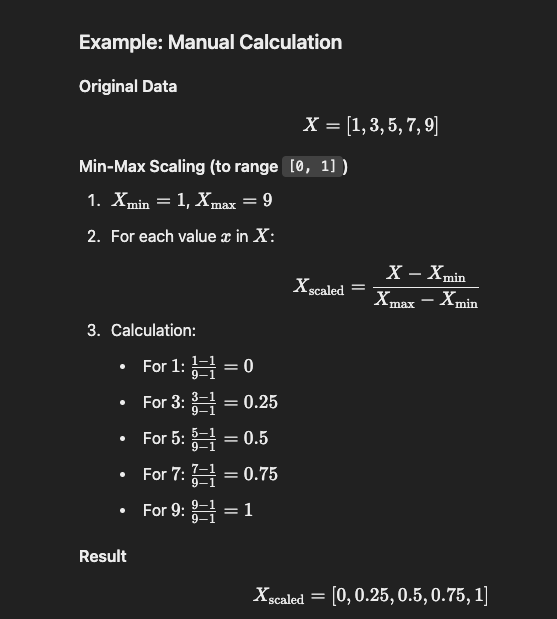

In [96]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample data
data = {'feature1': [1, 5, 10], 'feature2': [20, 30, 50]}
df = pd.DataFrame(data)
print(df)
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a dataframe
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)

   feature1  feature2
0         1        20
1         5        30
2        10        50
   feature1  feature2
0  0.000000  0.000000
1  0.444444  0.333333
2  1.000000  1.000000


In [97]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [98]:
housing_num_min_max_scaled[0]

array([-0.60851927,  0.11702128,  1.        , -0.83117147, -0.64116605,
       -0.80701754, -0.61433638, -0.7794789 ])

In [99]:
housing_num_min_max_scaled[10]

array([-0.43002028,  0.3893617 , -0.1372549 , -0.94536853, -0.93074569,
       -0.9115446 , -0.92682472, -0.74346561])

**Standardization** is different: first it subtracts the mean value (so standardized values
have a zero mean), then it divides the result by the standard deviation (so standard‐
ized values have a standard deviation equal to 1). Unlike min-max scaling, standardi‐
zation does not restrict values to a specific range. However, standardization is much
less affected by outliers. For example, suppose a district has a median income equal
to 100 (by mistake), instead of the usual 0–15. Min-max scaling to the 0–1 range
would map this outlier down to 1 and it would crush all the other values down to
0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a
transformer called StandardScaler for standardization:

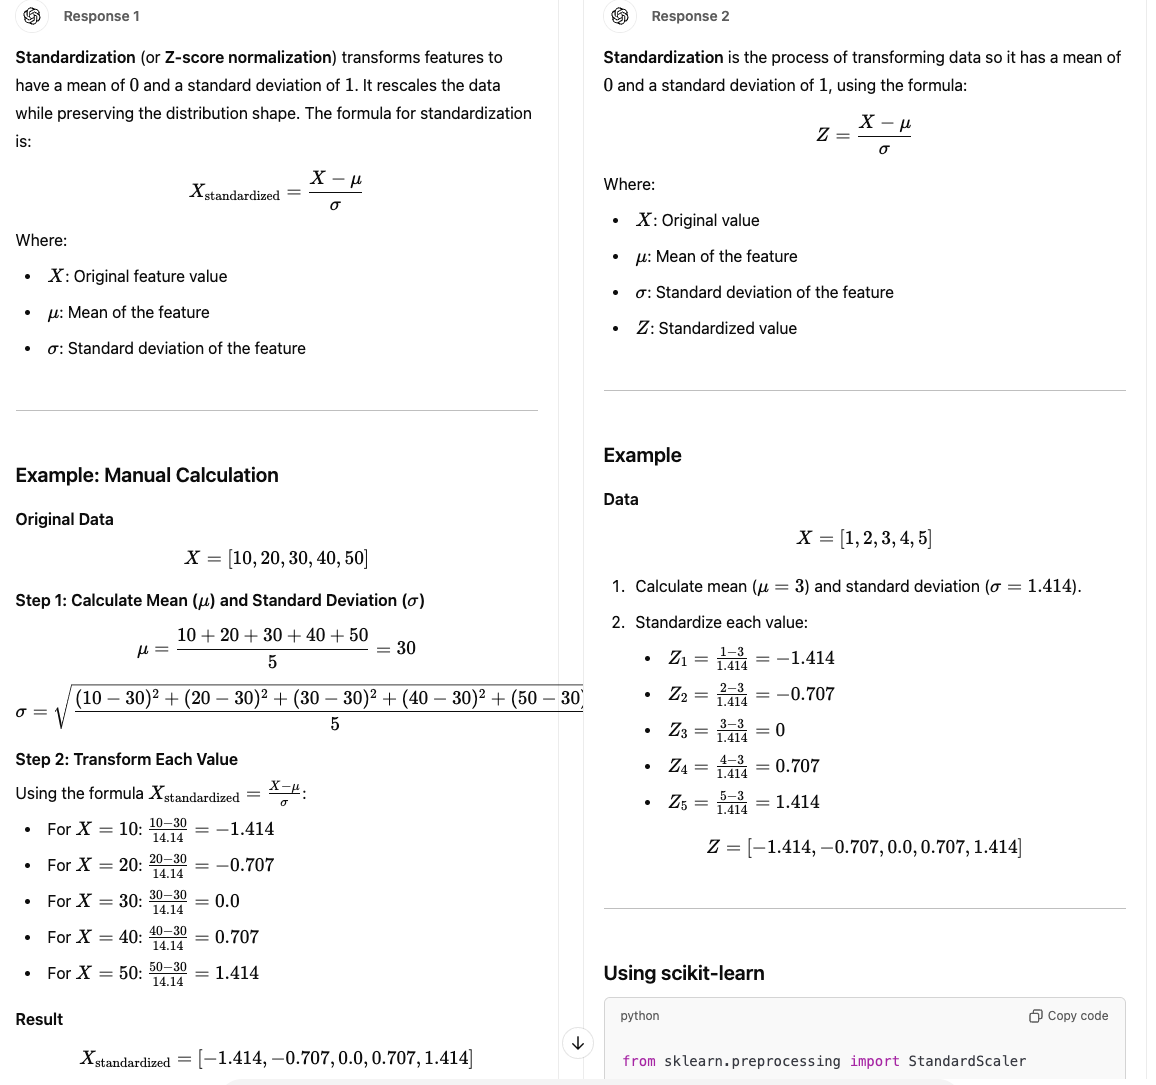

In [100]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Sample data
data = pd.DataFrame({
    "Feature1": [1, 2, 3, 4, 5],
    "Feature2": [10, 20, 30, 40, 50],
    "Feature3": [45, 32, 12, 1099, 50]
})

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Convert back to DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

print("Original Data:\n", data)
print("\nScaled Data:\n", scaled_df)


Original Data:
    Feature1  Feature2  Feature3
0         1        10        45
1         2        20        32
2         3        30        12
3         4        40      1099
4         5        50        50

Scaled Data:
    Feature1  Feature2  Feature3
0 -1.414214 -1.414214 -0.475696
1 -0.707107 -0.707107 -0.506219
2  0.000000  0.000000 -0.553178
3  0.707107  0.707107  1.999049
4  1.414214  1.414214 -0.463956


In [101]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [102]:
housing_num_std_scaled[0]

array([-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.35909429,
        0.13746004,  1.39481249, -0.93649149])

In [103]:
housing_num_std_scaled[10]

array([-0.98316047,  1.61363524, -0.44314643, -0.7154437 , -0.76194354,
       -0.64079108, -0.79139838, -0.79848052])

When a feature’s distribution has a heavy tail (i.e., when values far from the mean
are not exponentially rare), both min-max scaling and standardization will squash
most values into a small range. Machine learning models generally don’t like this
at all, as you will see in Chapter 4. So before you scale the feature, you should first
transform it to shrink the heavy tail, and if possible to make the distribution roughly
symmetrical. For example, a common way to do this for positive features with a heavy
tail to the right is to replace the feature with its square root (or raise the feature to
a power between 0 and 1). If the feature has a really long and heavy tail, such as a
power law distribution, then replacing the feature with its logarithm may help. For
example, the population feature roughly follows a power law: districts with 10,000
inhabitants are only 10 times less frequent than districts with 1,000 inhabitants, not
exponentially less frequent. Figure 2-17 shows how much better this feature looks
when you compute its log: it’s very close to a Gaussian distribution (i.e., bell-shaped).

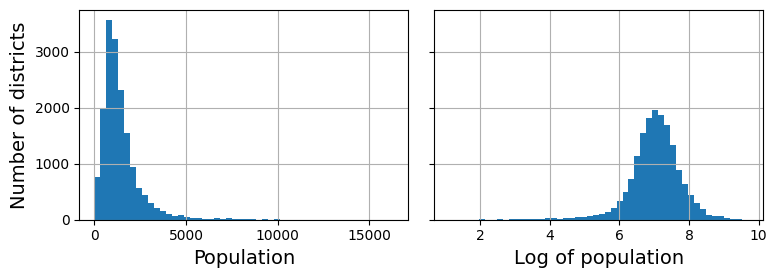

In [104]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

What if we replace each value with its percentile?

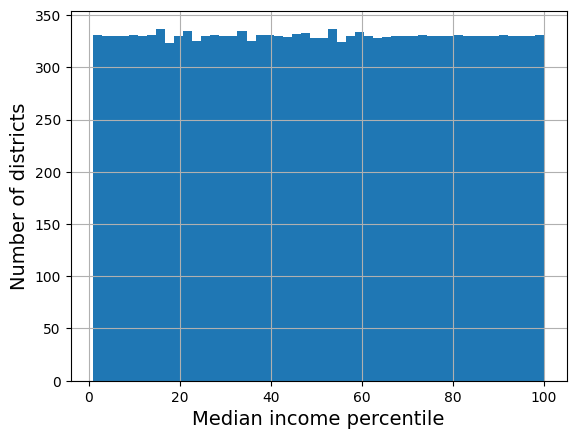

In [105]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

**Bucketing:**
Another approach to handle heavy-tailed features consists in bucketizing the feature.
This means chopping its distribution into roughly equal-sized buckets, and replacing
each feature value with the index of the bucket it belongs to, much like we did to
create the income_cat feature (although we only used it for stratified sampling).
For example, you could replace each value with its percentile. Bucketizing with
equal-sized buckets results in a feature with an almost uniform distribution, so there’s
no need for further scaling, or you can just divide by the number of buckets to force
the values to the 0–1 range.

When a feature has a multimodal distribution (i.e., with two or more clear peaks,
called modes), such as the housing_median_age feature, it can also be helpful to
bucketize it, but this time treating the bucket IDs as categories, rather than as numeri‐
cal values. This means that the bucket indices must be encoded, for example using a
OneHotEncoder (so you usually don’t want to use too many buckets). This approach
will allow the regression model to more easily learn different rules for different ranges
of this feature value. For example, perhaps houses built around 35 years ago have
a peculiar style that fell out of fashion, and therefore they’re cheaper than their age
alone would suggest.

**Radial Basis function:**
Another approach to transforming multimodal distributions is to add a feature for
each of the modes (at least the main ones), representing the similarity between the
housing median age and that particular mode. The similarity measure is typically
computed using a Radial Basis Function (RBF)—any function that depends only on the
distance between the input value and a fixed point. The most commonly used RBF is
the Gaussian RBF, whose output value decays exponentially as the input value moves
away from the fixed point. For example, the Gaussian RBF similarity between the
housing age of x and age=35 is given by the equation exp(–γ(x – 35)²) where γ (is called as gamma). The hyperparameter
γ (gamma) determines how quickly the similarity measure decays as x moves away
from 35. Using Scikit-Learn’s rbf_kernel() function, you can create a new Gaussian
RBF feature measuring the similarity between the housing median age and 35:

Below shows this new feature as a function of the housing median age (solid
line). It also shows what the feature would look like if you used a smaller gamma value.
As the chart shows, the new age similarity feature peaks at 35, right around the spike
in the housing median age distribution: if this particular age group is well correlated
with lower prices, there’s a good chance that this new feature will help.

In [106]:
from sklearn.svm import SVC
import numpy as np

# Example data (Below X has two features & y has one label, eg: at feature [1,2] then lable =0)
X = np.array([[1, 2], [2, 3], [3, 4], [5, 6]])
y = [0, 0, 1, 1]

# SVM with RBF kernel
model = SVC(kernel='rbf', gamma=0.5)
model.fit(X, y)

# Predict
print(model.predict([[3, 4]]))  # Output: [1]

[1]


In [107]:
import numpy as np

# Define two sample points
x1 = np.array([1, 2])
x2 = np.array([3, 4])

# Define the gamma parameter
gamma = 0.5

# Compute the squared Euclidean distance
distance_squared = np.sum((x1 - x2)**2)
print("so distince_squared is: ",distance_squared)
print("-gamma * distinace_squared is: ",-gamma*distance_squared)
print("\n")
# Compute the RBF kernel value
rbf_kernel_value = np.exp(-gamma * distance_squared)

print(f"RBF Kernel value: {rbf_kernel_value}")


so distince_squared is:  8
-gamma * distinace_squared is:  -4.0


RBF Kernel value: 0.01831563888873418


**Below is the details on np.exp()**

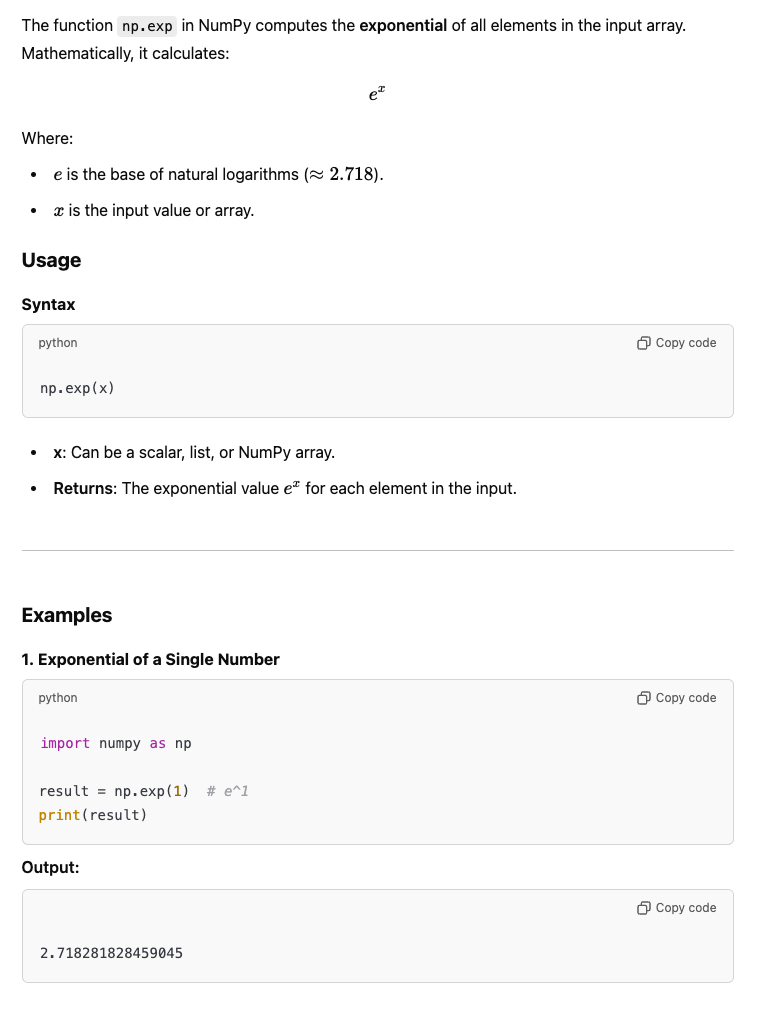

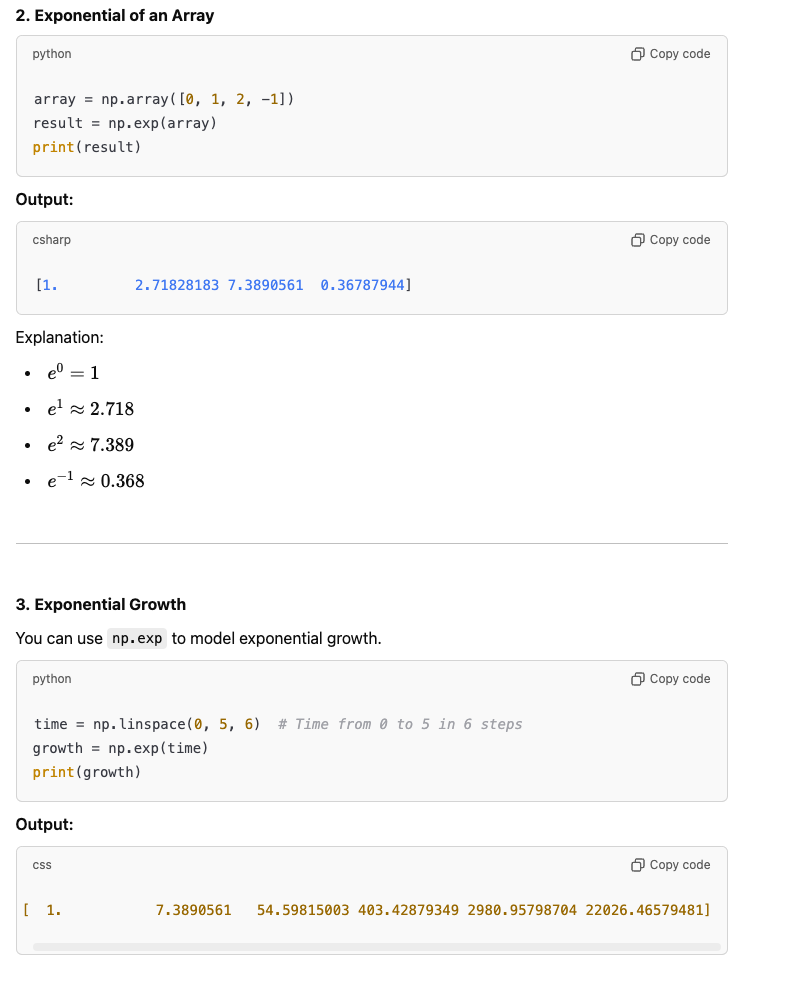

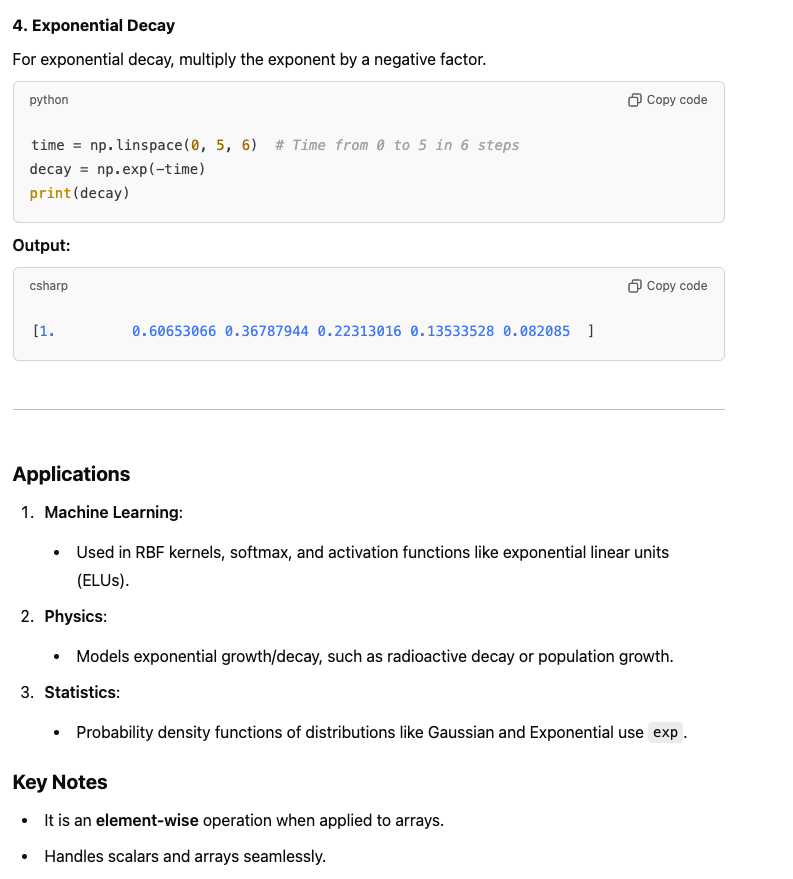

In [108]:
from sklearn.metrics.pairwise import rbf_kernel
#so in this case we are verifying age 35's similarity
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

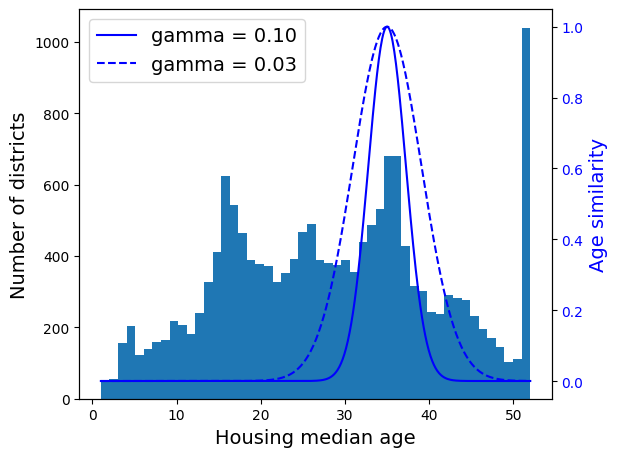

In [109]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

So far we’ve only looked at the input features, but the target values may also need
to be transformed. For example, if the target distribution has a heavy tail, you may
choose to replace the target with its logarithm. But if you do, the regression model
will now predict the log of the median house value, not the median house value itself.
You will need to compute the exponential of the model’s prediction if you want the
predicted median house value.

Luckily, most of Scikit-Learn’s transformers have an inverse_transform() method *brings original data back* ,
making it easy to compute the inverse of their transformations. For example, the
following code example shows how to scale the labels using a StandardScaler (just
like we did for inputs), then train a simple linear regression model on the resulting
scaled labels and use it to make predictions on some new data, which we transform
back to the original scale using the trained scaler’s inverse_transform() method.
Note that we convert the labels from a Pandas Series to a DataFrame, since the
StandardScaler expects 2D inputs. Also, in this example we just train the model on a
single raw input feature (median income), for simplicity:

In [110]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
# above have ran this -->. housing_labels = strat_train_set["median_house_value"].copy()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data) #thisis currently in StandardScalar values
predictions = target_scaler.inverse_transform(scaled_predictions) #brings original data back

**StandardScalar & Inverser_transfrom**

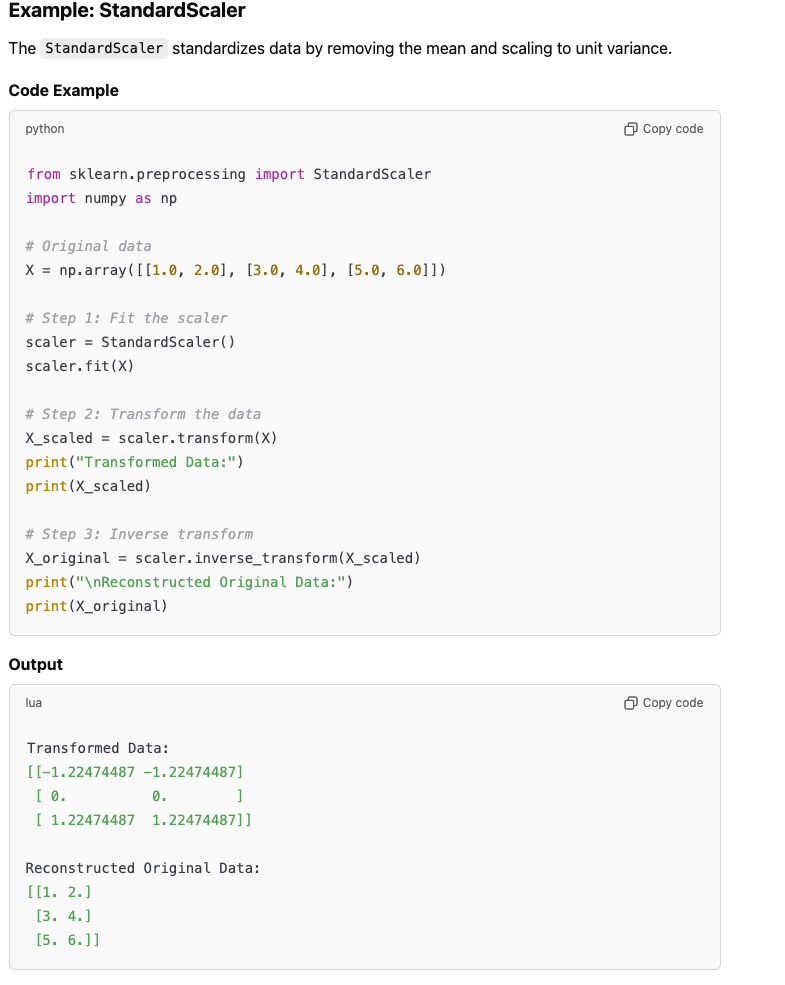

In [111]:
scaled_labels[:10]

array([[ 2.18511202],
       [ 2.40625396],
       [-0.90740625],
       [-0.95597075],
       [ 1.34824154],
       [-0.98632357],
       [ 1.23983863],
       [ 2.03421517],
       [-0.40094784],
       [-0.1945487 ]])

This works fine, but a simpler option is to use a TransformedTargetRegressor. We
just need to construct it, giving it the regression model and the label transformer,
then fit it on the training set, using the original unscaled labels. It will automatically
use the transformer to scale the labels and train the regression model on the resulting
scaled labels, just like we did previously. Then, when we want to make a prediction, it
will call the regression model’s predict() method and use the scaler’s inverse_trans
form() method to produce the prediction:

In [112]:
predictions #brings original data back

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [113]:
#this is same as above code, but using TransformedTargetRegressor we can do all above steps in one Transformersa
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [114]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

# Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom transformations, cleanup operations, or combin‐
ing specific attributes.
For transformations that don’t require any training, you can just write a function
that takes a NumPy array as input and outputs the transformed array. For example,
as discussed in the previous section, it’s often a good idea to transform features
with heavy-tailed distributions by replacing them with their logarithm (assuming the
feature is positive and the tail is on the right). Let’s create a log-transformer and apply
it to the population feature:

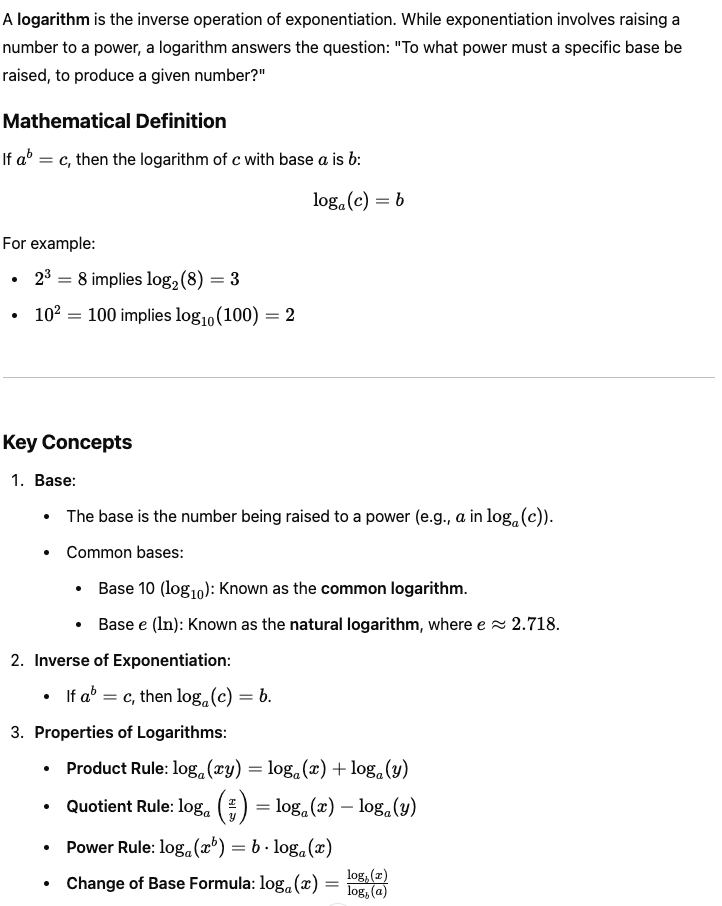

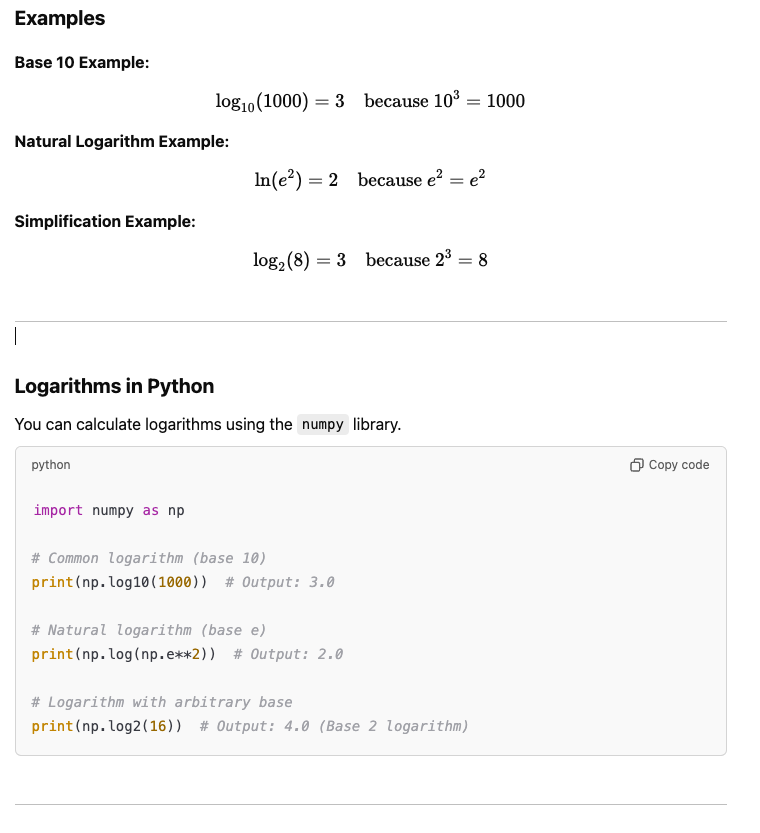

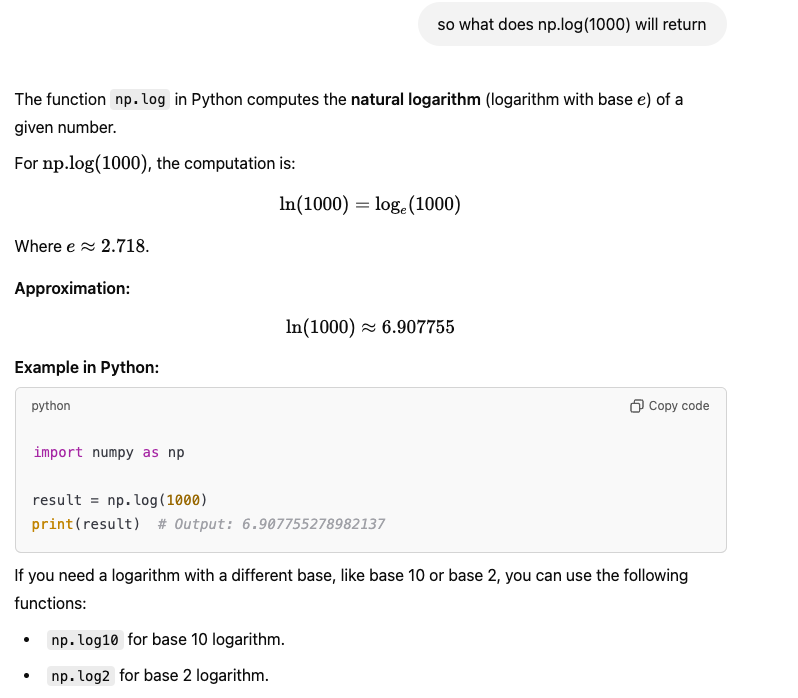

In [115]:
import numpy as np

# Common logarithm , where ~e=2.718
print(np.log(1000))  # Output: 6.907777

# Common logarithm (base 10)
print(np.log10(1000))  # Output: 3.0



# Natural logarithm (base e)
print(np.log(np.e**2))  # Output: 2.0

# Logarithm with arbitrary base
print(np.log2(16))  # Output: 4.0 (Base 2 logarithm)


6.907755278982137
3.0
2.0
4.0


In [116]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [117]:
log_pop.head()

population
13096    7.362645
14973    6.501290
3785     6.331502
14689    7.520235
20507    7.555905

In [118]:
housing[["population"]].head()

population
13096      1576.0
14973       666.0
3785        562.0
14689      1845.0
20507      1912.0

The inverse_func argument is optional. It lets you specify an inverse transform
function, e.g., if you plan to use your transformer in a TransformedTargetRegressor.
Your transformation function can take hyperparameters as additional arguments. For
example, here’s how to create a transformer that computes the same Gaussian RBF
similarity measure as earlier:

In [119]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [120]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [121]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

Note that there’s no inverse function for the RBF kernel, since there are always two
values at a given distance from a fixed point (except at distance 0). Also note that
rbf_kernel() does not treat the features separately. If you pass it an array with
two features, it will measure the 2D distance (Euclidean) to measure similarity. For
example, here’s how to add a feature that will measure the geographic similarity
between each district and San Francisco:

In [122]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

Custom transformers are also useful to combine features. For example, here’s a
FunctionTransformer that computes the ratio between the input features 0 and 1:

In [123]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

**FunctionTransfer**

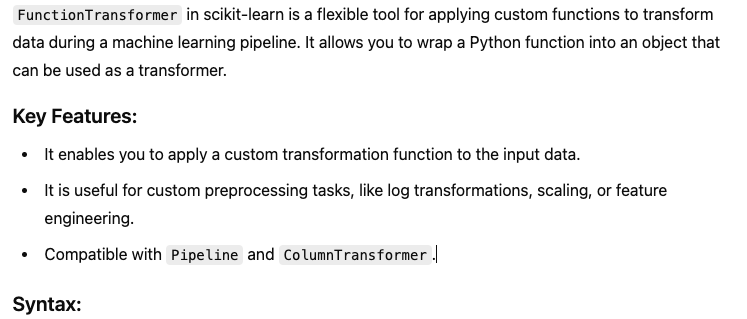

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(func, inverse_func=None, validate=False, kw_args=None, inv_kw_args=None)

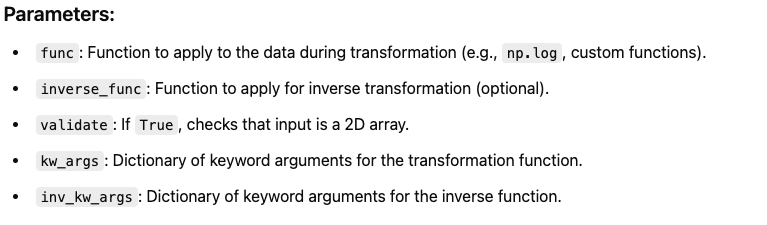

**Example 1: Log Transformation**

In [124]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Sample data
data = np.array([[1, 10, 100], [2, 20, 200]])

# Apply log transformation
log_transformer = FunctionTransformer(np.log1p)  # np.log1p computes log(1+x)
transformed_data = log_transformer.transform(data)

print("Original Data:\n", data)
print("Log Transformed Data:\n", transformed_data)


Original Data:
 [[  1  10 100]
 [  2  20 200]]
Log Transformed Data:
 [[0.69314718 2.39789527 4.61512052]
 [1.09861229 3.04452244 5.30330491]]


**Example 2: Custom Transformation**

In [125]:
from sklearn.preprocessing import FunctionTransformer

# Define a custom function
def square_data(x):
    return x ** 2

# Create a FunctionTransformer
square_transformer = FunctionTransformer(square_data)

# Sample data
data = np.array([[1, 2, 3], [4, 5, 6]])

# Apply the custom transformation
transformed_data = square_transformer.transform(data)

print("Original Data:\n", data)
print("Squared Data:\n", transformed_data)


Original Data:
 [[1 2 3]
 [4 5 6]]
Squared Data:
 [[ 1  4  9]
 [16 25 36]]



**Example 3: Pipeline Integration**

In [126]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1, 10], [2, 20], [3, 30]])
y = np.array([1, 2, 3])

# Define a pipeline with a log transformation
pipeline = Pipeline([
    ('log_transform', FunctionTransformer(np.log1p)),
    ('regressor', LinearRegression())
])

# Fit and predict
pipeline.fit(X, y)
predictions = pipeline.predict(X)

print("Predictions:", predictions)

Predictions: [1. 2. 3.]


**FunctionTransformer** is very handy, but what if you would like your transformer to
be trainable, learning some parameters in the fit() method and using them later
in the transform() method? For this, you need to write a custom class. Scikit-Learn
relies on duck typing, so this class does not have to inherit from any particular base
class. All it needs is three methods: fit() (which must return self), transform(),
and fit_transform().
You can get fit_transform() for free by simply adding TransformerMixin as a base
class: the default implementation will just call fit() and then transform(). If you
add BaseEstimator as a base class (and avoid using *args and **kwargs in your
constructor), you will also get two extra methods: get_params() and set_params().
These will be useful for automatic hyperparameter tuning.
For example, here’s a custom transformer that acts much like the StandardScaler:

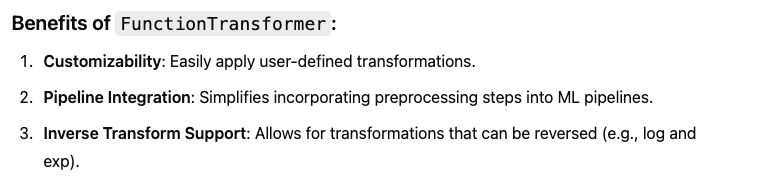

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

Here are a few things to note:

• The sklearn.utils.validation package contains several functions we can use
to validate the inputs. For simplicity, we will skip such tests in the rest of this
book, but production code should have them.

`• Scikit-Learn pipelines require the fit() `method to have two arguments X and y,
which is why we need the y=None argument even though we don’t use y.

• All Scikit-Learn estimators set` n_features_in_ in the fit() method`, and they
ensure that the data passed to `transform() or predict()` has this number of
features.




• The fit() method must return self.

• This implementation is not 100% complete: all estimators should set
feature_names_in_ in the fit() method when they are passed a DataFrame.
Moreover, all transformers should provide a get_feature_names_out() method,
as well as an inverse_transform() method when their transformation can be
reversed. See the last exercise at the end of this chapter for more details.


A custom transformer can (and often does) use other estimators in its implementa‐
tion. For example, the following code demonstrates custom transformer that uses a
KMeans clusterer in the fit() method to identify the main clusters in the training
data, and then uses rbf_kernel() in the transform() method to measure how
similar each sample is to each cluster center:

In [128]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

k-means is a clustering algorithm that locates clusters in
the data. How many it searches for is controlled by the n_clusters hyperparameter.
After training, the cluster centers are available via the cluster_centers_ attribute.
The fit() method of KMeans supports an optional argument sample_weight, which
lets the user specify the relative weights of the samples. k-means is a stochastic
algorithm, meaning that it relies on randomness to locate the clusters, so if you
want reproducible results, you must set the random_state parameter. As you can see,
despite the complexity of the task, the code is fairly straightforward. Now let’s use this
custom transformer:

In [129]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels) #housing_labels has median_housing price

In [130]:
similarities[:3]

array([[7.90165632e-02, 4.29901164e-14, 6.03972145e-01, 1.35315136e-23,
        7.70290967e-05, 9.86669410e-01, 5.42432210e-08, 1.98273138e-03,
        6.66241631e-17, 1.40931619e-01],
       [5.82488504e-14, 9.90046143e-01, 1.62296800e-10, 3.84360842e-02,
        4.56888397e-04, 1.31326258e-13, 1.10891612e-01, 2.99695991e-26,
        6.32121447e-01, 1.49980122e-09],
       [4.44899714e-01, 1.43260203e-14, 2.98432127e-01, 4.02426743e-24,
        1.56945165e-04, 6.99838501e-01, 1.05721178e-08, 1.01045486e-02,
        2.87904572e-17, 2.88731307e-01]])

above code creates a ClusterSimilarity transformer, setting the number of clusters to 10. Then it calls fit_transform() with the latitude and longitude of every district in
the training set, weighting each district by its median house value. The transformer
uses k-means to locate the clusters, then measures the Gaussian RBF similarity
between each district and all 10 cluster centers. The result is a matrix with one row
per district, and one column per cluster. Let’s look at the first three rows, rounding to
two decimal places

In [131]:
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

In [132]:
housing[["latitude", "longitude"]]

latitude  longitude
13096     37.80    -122.42
14973     34.14    -118.38
3785      38.36    -121.98
14689     33.75    -117.11
20507     33.77    -118.15
...         ...        ...
14207     33.86    -118.40
13105     36.32    -119.31
19301     32.59    -117.06
19121     34.06    -118.40
19888     37.66    -122.41

[16512 rows x 2 columns]

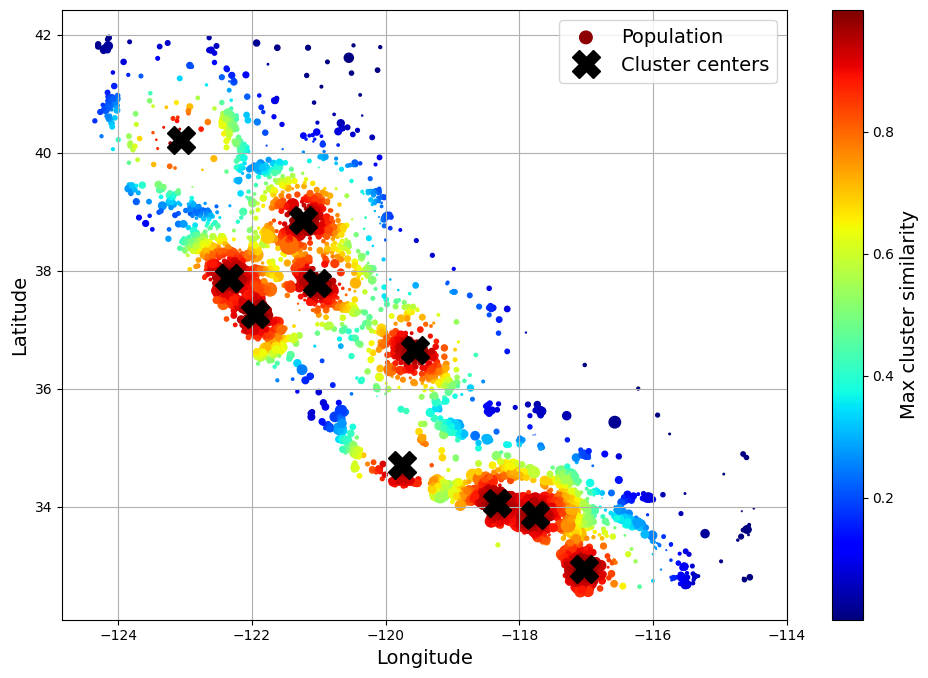

In [133]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

# Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed
in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for numerical attributes,
which will first impute then scale the input features:

Now let's build a pipeline to preprocess the numerical attributes:



In [134]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")), #this is to fill the null values , here impute name of that pipelines
    ("standardize", StandardScaler()), #this is to bring raw into scaler data set, here standardize your nameof hte pipelines
])

In [135]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

The Pipeline constructor takes a list of name/estimator pairs (2-tuples) defining a
sequence of steps. The names can be anything you like, as long as they are unique
and don’t contain double underscores (__). They will be useful later, when we discuss
hyperparameter tuning. The estimators must all be transformers (i.e., they must
have a fit_transform() method), except for the last one, which can be anything: a
transformer, a predictor, or any other type of estimator.

If you don’t want to name the transformers, you can use the make_pipeline() func‐
tion instead; it takes transformers as positional arguments and creates a Pipeline
using the names of the transformers’ classes, in lowercase and without underscores
(e.g., "simpleimputer"):

In [136]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [137]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [138]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

If multiple transformers have the same name, an index is appended to their names
(e.g., "foo-1", "foo-2", etc.).
When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all the transformers, passing the output of each call as the parameter to the next call
until it reaches the final estimator, for which it just calls the fit() method.
The pipeline exposes the same methods as the final estimator. In this example the
last estimator is a StandardScaler, which is a transformer, so the pipeline also acts
like a transformer. If you call the pipeline’s transform() method, it will sequentially
apply all the transformations to the data. If the last estimator were a predictor instead
of a transformer, then the pipeline would have a predict() method rather than a
transform() method. Calling it would sequentially apply all the transformations to
the data and pass the result to the predictor’s predict() method.
Let’s call the pipeline’s fit_transform() method and look at the output’s first two
rows, rounded to two decimal places:

In [139]:
housing_num.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292

In [140]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [141]:
housing_num_prepared[:2]

array([[-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.36816703,
         0.13746004,  1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, -0.30861991, -0.43592476,
        -0.69377062, -0.37348471,  1.17194198]])

In [142]:
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [143]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()





```
As you saw earlier, if you want to recover a nice DataFrame, you can use the pipeline’s
get_feature_names_out() method:
```



In [144]:
#above -->housing_num_prepared = num_pipeline.fit_transform(housing_num), where housing_num is actuall raw original data
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [145]:
df_housing_num_prepared.head(2)  # extra code

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -1.423037  1.013606            1.861119     0.311912        1.368167   
14973   0.596394 -0.702103            0.907630    -0.308620       -0.435925   

       population  households  median_income  
13096    0.137460    1.394812      -0.936491  
14973   -0.693771   -0.373485       1.171942

In [146]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [147]:
num_pipeline[1]

StandardScaler()

In [148]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [149]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [150]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

Pipelines support indexing; for example, pipeline[1] returns the second estimator
in the pipeline, and pipeline[:-1] returns a Pipeline object containing all but the
last estimator. You can also access the estimators via the steps attribute, which is a
list of name/estimator pairs, or via the named_steps dictionary attribute, which maps
the names to the estimators. For example, num_pipeline["simpleimputer"] returns
the estimator named "simpleimputer".
So far, we have handled the categorical columns and the numerical columns sepa‐
rately.


It would be more convenient to have a single transformer capable of handling
all columns, applying the appropriate transformations to each column. For this,
you can use a **ColumnTransformer**. For example, the following ColumnTransformer
will apply num_pipeline (the one we just defined) to the numerical attributes and
cat_pipeline to the categorical attribute:

In [151]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), #fill nulls with most frequent string
    OneHotEncoder(handle_unknown="ignore")) #ignore nulls while doing OneHotEncoding

#this was already defined above
#num_pipeline = Pipeline([
#    ("impute", SimpleImputer(strategy="median")), #this is to fill the null values , here impute name of that pipelines
#    ("standardize", StandardScaler()), #this is to bring raw into scaler data set, here standardize your nameof hte pipelines])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [152]:
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

In [153]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

First we import the ColumnTransformer class, then we define the list of numeri‐
cal and categorical column names and construct a simple pipeline for categorical
attributes. Lastly, we construct a ColumnTransformer. Its constructor requires a list of
triplets (3-tuples), each containing a name (which must be unique and not contain
double underscores), a transformer, and a list of names (or indices) of columns that
the transformer should be applied to.

Since listing all the column names is not very convenient, Scikit-Learn provides
a make_column_selector() function that returns a selector function you can use
to automatically select all the features of a given type, such as numerical or cate‐
gorical. You can pass this selector function to the ColumnTransformer instead of
column names or indices. Moreover, if you don’t care about naming the transform‐
ers, you can use make_column_transformer(), which chooses the names for you,
just like make_pipeline() does. For example, the following code creates the same
ColumnTransformer as earlier, except the transformers are automatically named
"pipeline-1" and "pipeline-2" instead of "num" and "cat":

In [154]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [155]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b7dc9c88990>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b7dc9cbd150>)])

Now we’re ready to apply this ColumnTransformer to the housing data:

In [156]:
housing_prepared = preprocessing.fit_transform(housing)

In [157]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [158]:
# extra code – shows that we can get a DataFrame out if we want
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

pipeline-1__longitude  pipeline-1__latitude  \
13096              -1.423037              1.013606   
14973               0.596394             -0.702103   

       pipeline-1__housing_median_age  pipeline-1__total_rooms  \
13096                        1.861119                 0.311912   
14973                        0.907630                -0.308620   

       pipeline-1__total_bedrooms  pipeline-1__population  \
13096                    1.368167                0.137460   
14973                   -0.435925               -0.693771   

       pipeline-1__households  pipeline-1__median_income  \
13096                1.394812                  -0.936491   
14973               -0.373485                   1.171942   

       pipeline-2__ocean_proximity_<1H OCEAN  \
13096                                    0.0   
14973                                    1.0   

       pipeline-2__ocean_proximity_INLAND  pipeline-2__ocean_proximity_ISLAND  \
13096                                 0.0                                 0.0   
14973                                 0.0                                 0.0   

       pipeline-2__ocean_proximity_NEAR BAY  \
13096                                   1.0   
14973                                   0.0   

       pipeline-2__ocean_proximity_NEAR OCEAN  
13096                                     0.0  
14973                                     0.0

Great! We have a preprocessing pipeline that takes the entire training dataset and
applies each transformer to the appropriate columns, then concatenates the trans‐
formed columns horizontally (transformers must never change the number of rows).
Once again this returns a NumPy array, but you can get the column names using
preprocessing.get_feature_names_out() and wrap the data in a nice DataFrame
as we did before.

Your project is going really well and you’re almost ready to train some models! You
now want to create a single pipeline that will perform all the transformations you’ve
experimented with up to now. Let’s recap what the pipeline will do and why:



---


*   Missing values in numerical features will be imputed by replacing them with
the median, as most ML algorithms don’t expect missing values. In categorical
features, missing values will be replaced by the most frequent category.

---


*   The categorical feature will be one-hot encoded, as most ML algorithms only
accept numerical inputs.

---


*   A few ratio features will be computed and added: bedrooms_ratio,
rooms_per_house, and people_per_house. Hopefully these will better correlate
with the median house value, and thereby help the ML models.

---


*   A few cluster similarity features will also be added. These will likely be more
useful to the model than latitude and longitude.

---




*   Features with a long tail will be replaced by their logarithm, as most models

---





prefer features with roughly uniform or Gaussian distributions.
*   All numerical features will be standardized, as most ML algorithms prefer when
all features have roughly the same scale.

---
The code that builds the pipeline to do all of this should look familiar to you by now:



In [159]:
#above all putting in one cell together
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())


In [160]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]), #This ColumnTransformer applies the ratio_pipeline preprocessing steps to the columns "total_bedrooms" and "total_rooms", enabling tailored feature engineering or preprocessing for those specific columns in your dataset
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [161]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income ocean_proximity  
13096      1576.0      1034.0         2.0987        NEAR BAY  
14973       666.0       357.0         6.0876       <1H OCEAN  
3785        562.0       203.0         2.4330          INLAND  
14689      1845.0       780.0         2.2618          INLAND  
20507      1912.0      1172.0         3.5292      NEAR OCEAN

In [162]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [163]:
housing_prepared

array([[ 1.84662439, -0.86602737, -0.33020372, ...,  1.        ,
         0.        ,  1.86111875],
       [-0.5081207 ,  0.0245495 , -0.25361631, ...,  0.        ,
         0.        ,  0.90762971],
       [-0.20215476, -0.04119332, -0.05104091, ...,  0.        ,
         0.        ,  0.35142777],
       ...,
       [-0.24249175, -0.10998748,  0.15854151, ...,  0.        ,
         1.        , -1.23772062],
       [ 0.25977479, -0.36093745, -0.21033248, ...,  0.        ,
         0.        ,  0.66925745],
       [ 3.61270996, -1.32397227,  0.04958379, ...,  0.        ,
         1.        ,  1.22545939]])

If you run this ColumnTransformer, it performs all the transformations and outputs a
NumPy array with 24 features:

In [164]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Select and Train a Model

At last! You framed the problem, you got the data and explored it, you sampled a
training set and a test set, and you wrote a preprocessing pipeline to automatically
clean up and prepare your data for machine learning algorithms. You are now ready
to select and train a machine learning model.

# Train and Evaluate on the Training Set

### USING HOUSING(X) AND HOUSING_LABELS(Y) , WE WILL BE VERIFYING THREE DIFFERENT MODELS


*   LinearRegression Model
*   DecisionTree Model
*   Random Forest





In [165]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7b7...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b7dc9bdb710>)])),
                ('linearregression', LinearRegression())])

**Done! You now have a working linear regression model. You try it out on the training
set, looking at the first five predictions and comparing them to the labels:**

Let's try the full preprocessing pipeline on a few training instances:


In [166]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([242800., 375900., 127500.,  99400., 324600.])

Compare against the actual values:


In [167]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [168]:
# extra code – computes the error ratios discussed in the book
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-47.0%, -22.3%, 25.4%, 3.4%, -10.3%


Well, it works, but not always: the first prediction is way off (by over $200,000!),
while the other predictions are better: two are off by about 25%, and two are off
by less than 10%. Remember that you chose to use the RMSE as your performance
measure, so you want to measure this regression model’s RMSE on the whole training
set using Scikit-Learn’s mean_squared_error() function, with the squared argument
set to False:

In [169]:
#pip install --upgrade scikit-learn

**RMSE CALCULATION**

In [170]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(housing_labels, housing_predictions)

# Convert to RMSE
rmse = mse ** 0.5
print(rmse)

68647.95686706658


**RMSE Definition:**

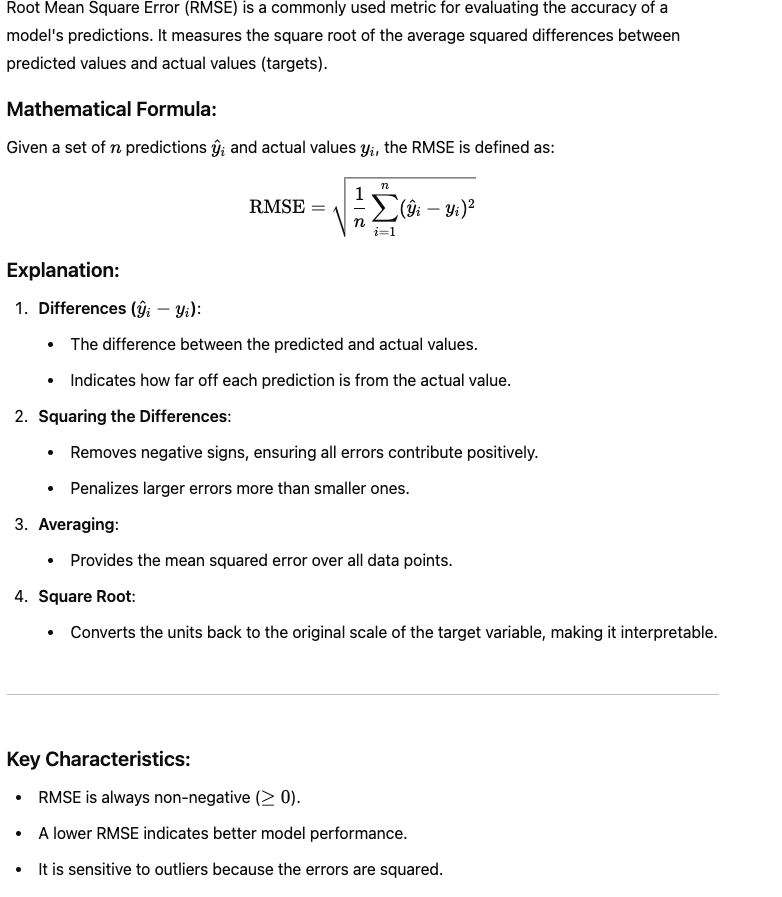

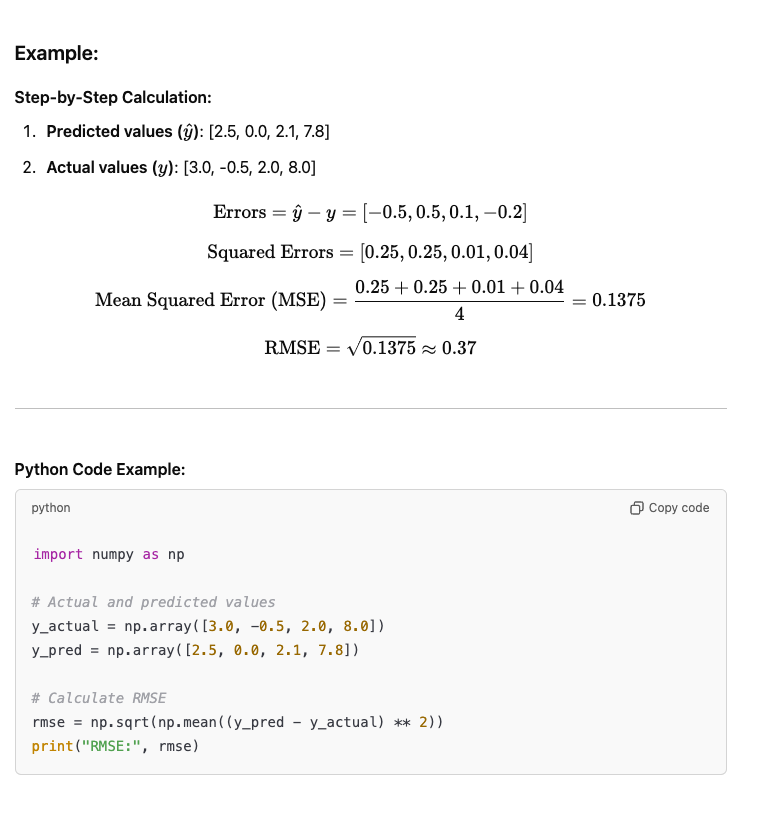



```
import numpy as np

# Actual and predicted values
y_actual = np.array([3.0, -0.5, 2.0, 8.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8])

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_actual) ** 2))
print("RMSE:", rmse)

```

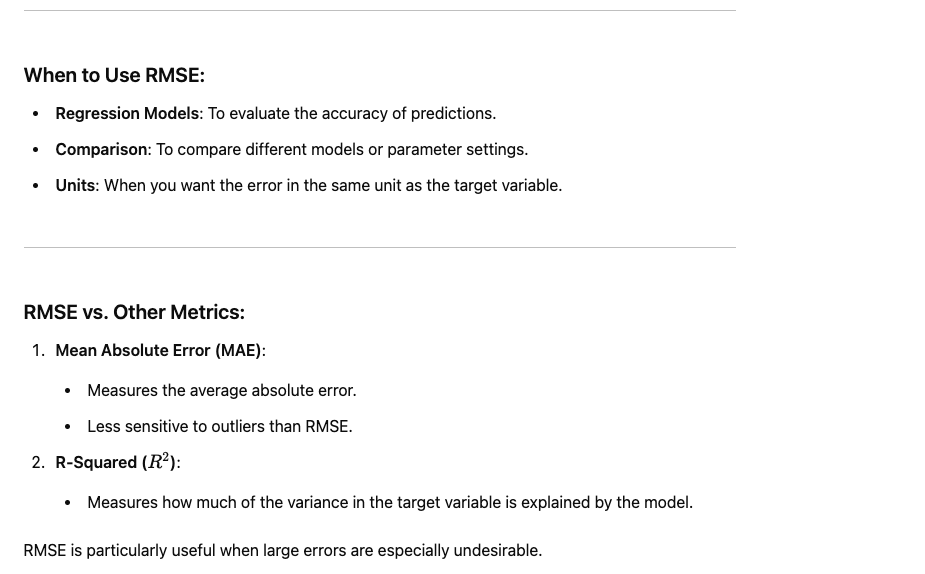


In [171]:
import numpy as np

# Actual and predicted values
y_actual = np.array([3.0, -0.5, 2.0, 8.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8])

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_actual) ** 2))
print("RMSE:", rmse)

RMSE: 0.37080992435478316


This is better than nothing, but clearly not a great score: the median_housing_values
of most districts range between 120,000 and 265,000, so a typical prediction error
of $68,628 is really not very satisfying. This is an example of a model underfitting the
training data. When this happens it can mean that the features do not provide enough
information to make good predictions, or that the model is not powerful enough.
As we saw in the previous chapter, the main ways to fix underfitting are to select a
more powerful model, to feed the training algorithm with better features, or to reduce
the constraints on the model. This model is not regularized, which rules out the last
option. You could try to add more features, but first you want to try a more complex
model to see how it does.
You decide to try a DecisionTreeRegressor, as this is a fairly powerful model capable
of finding complex nonlinear relationships in the data

In [172]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7b7...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b7dc9bdb710>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [173]:
from sklearn.metrics import mean_squared_error

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(housing_labels, housing_predictions)

# Compute Root Mean Squared Error (RMSE)
tree_rmse = mse ** 0.5

print(tree_rmse)

68647.95686706658


Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As you saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for training
and part of it for model validation.

# Better Evaluation Using Cross-Validation

One way to evaluate the decision tree model would be to use the train_
test_split() function to split the training set into a smaller training set and a
validation set, then train your models against the smaller training set and evaluate
them against the validation set. It’s a bit of effort, but nothing too difficult, and it
would work fairly well.

A great alternative is to use Scikit-Learn’s k_-fold cross-validation feature. The follow‐
ing code randomly splits the training set into 10 nonoverlapping subsets called folds,
then it trains and evaluates the decision tree model 10 times, picking a different fold
for evaluation every time and using the other 9 folds for training. The result is an
array containing the 10 evaluation scores:

In [174]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [175]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66366.983603
std       1976.844743
min      63557.655007
25%      65004.623899
50%      65886.897085
75%      68129.026040
max      69530.301101
dtype: float64

In [176]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     69847.923224
std       4078.407329
min      65659.761079
25%      68088.799156
50%      68697.591463
75%      69800.966364
max      80685.254832
dtype: float64

Now the decision tree doesn’t look as good as it did earlier. In fact, it seems to
perform almost as poorly as the linear regression model! Notice that cross-validation
allows you to get not only an estimate of the performance of your model, but also a
measure of how precise this estimate is (i.e., its standard deviation). The decision tree
has an RMSE of about 66,868, with a standard deviation of about 2,061. You would
not have this information if you just used one validation set. But cross-validation
comes at the cost of training the model several times, so it is not always feasible.
If you compute the same metric for the linear regression model, you will find that
the mean RMSE is 69,858 and the standard deviation is 4,182. So the decision tree
model seems to perform very slightly better than the linear model, but the difference
is minimal due to severe overfitting. We know there’s an overfitting problem because
the training error is low (actually zero) while the validation error is high.
Let’s try one last model now: the RandomForestRegressor. As you will see in Chap‐
ter 7, random forests work by training many decision trees on random subsets of
the features, then averaging out their predictions. Such models composed of many
other models are called ensembles: they are capable of boosting the performance of
90 | Chapter 2: End-to-End Machine Learning Project
the underlying model (in this case, decision trees). The code is much the same as
earlier

In [177]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [178]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     46938.209246
std       1018.397196
min      45522.649195
25%      46291.334639
50%      47021.703303
75%      47321.521991
max      49140.832210
dtype: float64

Wow, this is much better: random forests really look very promising for this task!
However, if you train a RandomForest and measure the RMSE on the training set,
you will find roughly 17,474: that’s much lower, meaning that there’s still quite a
lot of overfitting going on. Possible solutions are to simplify the model, constrain
it (i.e., regularize it), or get a lot more training data. Before you dive much deeper
into random forests, however, you should try out many other models from various
categories of machine learning algorithms (e.g., several support vector machines with
different kernels, and possibly a neural network), without spending too much time
tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising
models.

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [179]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)

In [180]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
forest_mse = mean_squared_error(housing_labels, housing_predictions)

# Calculate RMSE
forest_rmse = forest_mse ** 0.5

print(forest_rmse)

17521.565358779884


The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts

# Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now need to
fine-tune them. Let’s look at a few ways you can do that



# Grid Search

One option would be to fiddle with the hyperparameters manually, until you find a
great combination of hyperparameter values. This would be very tedious work, and
you may not have time to explore many combinations.
Instead, you can use Scikit-Learn’s GridSearchCV class to search for you. All you need
to do is tell it which hyperparameters you want it to experiment with and what valuesto try out, and it will use cross-validation to evaluate all the possible combinations
of hyperparameter values. For ex ample, the following code searches for the best
combination of hyperparameter values for the RandomForestRegressor:


In [181]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7b7dc9bdb710>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

Notice that you can refer to any hyperparameter of any estimator in a pipeline, even if this estimator is nested deep inside several pipelines and column transform‐ ers. For example, when Scikit-Learn sees "preprocessing__geo__n_clusters", it splits this string at the double underscores, then it looks for an estimator named "preprocessing" in the pipeline and finds the preprocessing ColumnTransformer. Next, it looks for a transformer named "geo" inside this ColumnTransformer and finds the ClusterSimilarity transformer we used on the latitude and longitude attributes. Then it finds this transformer’s n_clusters hyperparameter. Similarly, random_forest__max_features refers to the max_features hyperparameter of the estimator named "random_forest", which is of course the RandomForest model.

There are two dictionaries in this param_grid, so GridSearchCV will first evaluate all 3 × 3 = 9 combinations of n_clusters and max_features hyperparameter values specified in the first dict, then it will try all 2 × 3 = 6 combinations of hyperparame‐ ter values in the second dict. So in total the grid search will explore 9 + 6 = 15

combinations of hyperparameter values, and it will train the pipeline 3 times per combination, since we are using 3-fold cross validation. This means there will be a grand total of 15 × 3 = 45 rounds of training! It may take a while, but when it is done you can get the best combination of parameters like this:

In [182]:
grid_search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7b7dc9bdb710>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [183]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__transform_input', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 

Notice that you can refer to any hyperparameter of any estimator in a pipeline,
even if this estimator is nested deep inside several pipelines and column transform‐
ers. For example, when Scikit-Learn sees "preprocessing__geo__n_clusters", it
splits this string at the double underscores, then it looks for an estimator named
"preprocessing" in the pipeline and finds the preprocessing ColumnTransformer.
Next, it looks for a transformer named "geo" inside this ColumnTransformer and
finds the ClusterSimilarity transformer we used on the latitude and longitude
attributes. Then it finds this transformer’s n_clusters hyperparameter. Similarly,
random_forest__max_features refers to the max_features hyperparameter of the
estimator named "random_forest", which is of course the RandomForest model.


There are two dictionaries in this param_grid, so GridSearchCV will first evaluate
all 3 × 3 = 9 combinations of n_clusters and max_features hyperparameter values
specified in the first dict, then it will try all 2 × 3 = 6 combinations of hyperparame‐
ter values in the second dict. So in total the grid search will explore 9 + 6 = 15

combinations of hyperparameter values, and it will train the pipeline 3 times per
combination, since we are using 3-fold cross validation. This means there will be a
grand total of 15 × 3 = 45 rounds of training! It may take a while, but when it is done
you can get the best combination of parameters like this:

In [184]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [185]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7b7dc9c...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b7dc9abdcd0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

in this example, the best model is obtained by setting n_clusters to 15 and setting
max_features to 6.

In [186]:
grid_search.cv_results_

{'mean_fit_time': array([ 5.60434548,  8.59511042,  9.98047463,  5.82649708,  8.21155135,
        10.76305072,  5.92176859,  8.44795156, 10.72524611,  8.3958238 ,
        11.0003682 , 13.13530811,  8.88405363, 11.36439466, 13.88592744]),
 'std_fit_time': array([0.19147008, 1.29395195, 0.37698588, 0.22672275, 0.45212137,
        0.0417784 , 0.26750449, 0.41652329, 0.17331405, 0.36300262,
        0.05928753, 0.08148446, 0.26208103, 0.21752654, 0.04781085]),
 'mean_score_time': array([0.19769231, 0.19954181, 0.19545571, 0.20121829, 0.18206024,
        0.18274434, 0.19504356, 0.18033258, 0.19686945, 0.20282133,
        0.18644079, 0.22966536, 0.19739811, 0.19748529, 0.17985749]),
 'std_score_time': array([0.02011012, 0.01137313, 0.02602643, 0.01316973, 0.00532194,
        0.00324768, 0.02147815, 0.00097434, 0.02525063, 0.02553856,
        0.00529309, 0.00939317, 0.02282557, 0.01731108, 0.00149427]),
 'param_preprocessing__geo__n_clusters': masked_array(data=[5, 5, 5, 8, 8, 8, 10, 10, 10, 1

You can access the best estimator using grid_search.best_estimator_. If
GridSearchCV is initialized with refit=True (which is the default), then once it finds
the best estimator using cross-validation, it retrains it on the whole training set. This
is usually a good idea, since feeding it more data will likely improve its performance.
The evaluation scores are available using grid_search.cv_results_. This is a dictio‐
nary, but if you wrap it in a DataFrame you get a nice list of all the test scores for
each combination of hyperparameters and for each cross-validation split, as well as
the mean test score across all splits:

Let's look at the score of each hyperparameter combination tested during the grid search:


In [187]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head(20)

n_clusters  max_features  split0  split1  split2  mean_test_rmse
12          15             6   43007   43683   44158           43616
13          15             8   43697   44011   44819           44176
7           10             6   43710   44133   45227           44356
9           10             6   43710   44133   45227           44356
6           10             4   43798   44233   45100           44377
14          15            10   44209   44558   45049           44605
3            8             4   44386   44490   45257           44711
4            8             6   44579   44713   45550           44947
8           10             8   44499   44931   45616           45015
10          10             8   44499   44931   45616           45015
5            8             8   45159   45447   46089           45565
11          10            10   45336   45493   46135           45655
0            5             4   45907   46208   47371           46495
1            5             6   46516   46386   47469           46790
2            5             8   46919   46958   47862           47247

The mean test RMSE score for the best model is 44,042, which is better than the
score you got earlier using the default hyperparameter values (which was 47,019).
Congratulations, you have successfully fine-tuned your best model!

# Randomized Search

The grid search approach is fine when you are exploring relatively few combinations,
like in the previous example, but RandomizedSearchCV is often preferable, especially
when the hyperparameter search space is large. This class can be used in much
the same way as the GridSearchCV class, but instead of trying out all possible
Fine-Tune Your Model | 93
combinations it evaluates a fixed number of combinations, selecting a random value
for each hyperparameter at every iteration. This may sound surprising, but this
approach has several benefits:



*   If some of your hyperparameters are continuous (or discrete but with many
possible values), and you let randomized search run for, say, 1,000 iterations, then
it will explore 1,000 different values for each of these hyperparameters, whereas
grid search would only explore the few values you listed for each one.
*   Suppose a hyperparameter does not actually make much difference, but you don’t
know it yet. If it has 10 possible values and you add it to your grid search, then
training will take 10 times longer. But if you add it to a random search, it will not
make any difference.
*   If there are 6 hyperparameters to explore, each with 10 possible values, then grid
search offers no other choice than training the model a million times, whereas
random search can always run for any number of iterations you choose.



For each hyperparameter, you must provide either a list of possible values, or a
probability distribution:



In [188]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (n_iter × cv) random combinations of hyperparameters:


In [189]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b7dc9a2af90>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b7dc985ab90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [190]:
#extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head(20)

n_clusters  max_features  split0  split1  split2  mean_test_rmse
1          45             9   41224   42385   42712           42107
8          32             7   41374   42579   43230           42394
0          41            16   42397   42640   43175           42738
5          42             4   41874   43348   43690           42971
2          23             8   42421   43138   43585           43048
6          24             3   42339   43436   44239           43338
7          26            13   43138   43476   44042           43552
4          13             5   43044   43463   44225           43578
3          21            12   43471   44070   44510           44017
9           4             2   48955   48621   50168           49248

Bonus section: how to choose the sampling distribution for a hyperparameter

scipy.stats.randint(a, b+1): for hyperparameters with discrete values that range from a to b, and all values in that range seem equally likely.
scipy.stats.uniform(a, b): this is very similar, but for continuous hyperparameters.
scipy.stats.geom(1 / scale): for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
scipy.stats.expon(scale): this is the continuous equivalent of geom. Just set scale to the most likely value.
scipy.stats.loguniform(a, b): when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.
Here are plots of the probability mass functions (for discrete variables), and probability density functions (for continuous variables) for randint(), uniform(), geom() and expon():

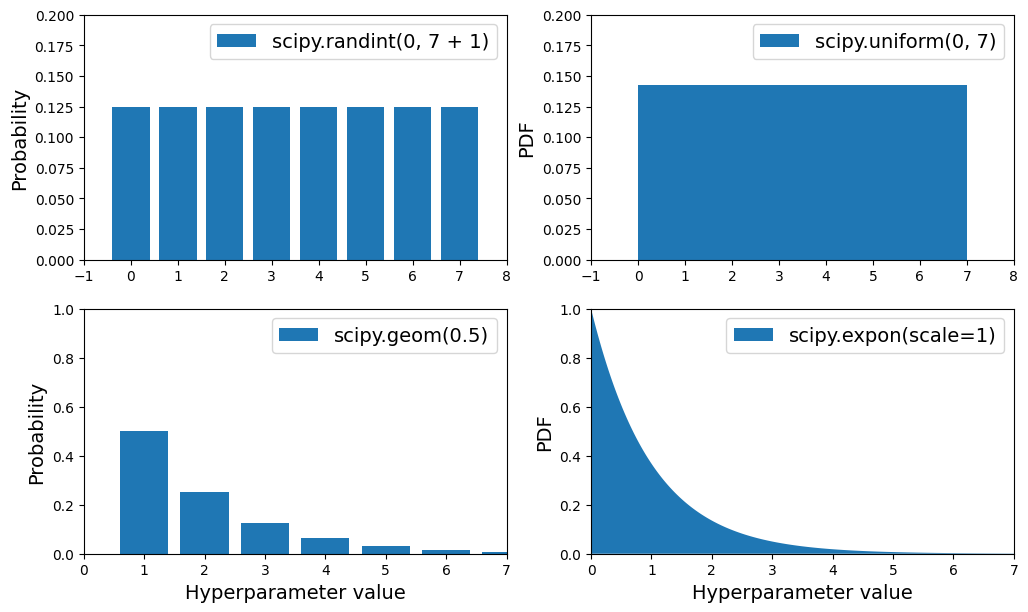

In [191]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

Here are the PDF for expon() and loguniform() (left column), as well as the PDF of log(X) (right column). The right column shows the distribution of hyperparameter scales. You can see that expon() favors hyperparameters with roughly the desired scale, with a longer tail towards the smaller scales. But loguniform() does not favor any scale, they are all equally likely:

Scikit-Learn also has HalvingRandomSearchCV and HalvingGridSearchCV hyperpara‐
meter search classes. Their goal is to use the computational resources more efficiently,
either to train faster or to explore a larger hyperparameter space. Here’s how they
work: in the first round, many hyperparameter combinations (called “candidates”) are
generated using either the grid approach or the random approach. These candidates
are then used to train models that are evaluated using cross-validation, as usual.
However, training uses limited resources, which speeds up this first round consider‐
ably. By default, “limited resources” means that the models are trained on a small
part of the training set. However, other limitations are possible, such as reducing
the number of training iterations if the model has a hyperparameter to set it. Once
every candidate has been evaluated, only the best ones go on to the second round,
where they are allowed more resources to compete. After several rounds, the final
candidates are evaluated using full resources. This may save you some time tuning
hyperparameters.

# Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform
best. The group (or “ensemble”) will often perform better than the best individual
model—just like random forests perform better than the individual decision trees
they rely on—especially if the individual models make very different types of errors.
For example, you could train and fine-tune a k-nearest neighbors model, then create
an ensemble model that just predicts the mean of the random forest prediction and
that model’s prediction. We will cover this topic in more detail in Chapter 7.

# Analyze the Best Models and Their Errors


You will often gain good insights on the problem by inspecting the best models. For
example, the RandomForestRegressor can indicate the relative importance of each
attribute for making accurate predictions:

In [192]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.02, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

Let’s sort these importance scores in descending order and display them next to their
corresponding attribute names:

In [193]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.18883049114642353, 'log__median_income'),
 (0.07550690165952419, 'cat__ocean_proximity_INLAND'),
 (0.06427087748676082, 'bedrooms__ratio'),
 (0.0521695509969851, 'rooms_per_house__ratio'),
 (0.04664258696240615, 'people_per_house__ratio'),
 (0.04244311259449021, 'geo__Cluster 3 similarity'),
 (0.02329106317954673, 'geo__Cluster 17 similarity'),
 (0.022649484211911694, 'geo__Cluster 18 similarity'),
 (0.02197243576680579, 'geo__Cluster 22 similarity'),
 (0.01881537204558837, 'geo__Cluster 40 similarity'),
 (0.01766998676736003, 'geo__Cluster 10 similarity'),
 (0.01754694953848625, 'geo__Cluster 35 similarity'),
 (0.017274903717750808, 'geo__Cluster 41 similarity'),
 (0.016055663107420095, 'geo__Cluster 6 similarity'),
 (0.015811758952117744, 'geo__Cluster 2 similarity'),
 (0.01477755940463033, 'geo__Cluster 32 similarity'),
 (0.01384559635134935, 'geo__Cluster 43 similarity'),
 (0.013738038212939275, 'geo__Cluster 21 similarity'),
 (0.013012561860104492, 'geo__Cluster 39 similarity'

With this information, you may want to try dropping some of the less useful features
(e.g., apparently only one ocean_proximity category is really useful, so you could try
dropping the others).
The sklearn.feature_selection.SelectFromModel transformer
can automatically drop the least useful features for you: when you
fit it, it trains a model (typically a random forest), looks at its fea
ture_importances_ attribute, and selects the most useful features.
Then when you call transform(), it drops the other features.

You should also look at the specific errors that your system makes, then try to
understand why it makes them and what could fix the problem: adding extra features
or getting rid of uninformative ones, cleaning up outliers, etc.

Now is also a good time to ensure that your model not only works well on average,
but also on all categories of districts, whether they’re rural or urban, rich or poor,
northern or southern, minority or not, etc. Creating subsets of your validation set for
each category takes a bit of work, but it’s important: if your model performs poorly on
a whole category of districts, then it should probably not be deployed until the issue
is solved, or at least it should not be used to make predictions for that category, as it
may do more harm than good.

# Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs
sufficiently well. You are ready to evaluate the final model on the test set. There is
nothing special about this process; just get the predictors and the labels from your
test set and run your final_model to transform the data and make predictions, then
evaluate these predictions

In [194]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)


In [195]:
from sklearn.metrics import mean_squared_error

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, final_predictions)

# Compute Root Mean Squared Error (RMSE)
final_rmse = mse ** 0.5

print(final_rmse)

41556.053474456494


In some cases, such a point estimate of the generalization error will not be quite
enough to convince you to launch: what if it is just 0.1% better than the model
currently in production? You might want to have an idea of how precise this estimate
is. For this, you can compute a 95% confidence interval for the generalization error
using scipy.stats.t.interval(). You get a fairly large interval from 39,275 to
43,467, and your previous point estimate of 41,424 is roughly in the middle of it:

In [196]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39415.11928419, 43591.96637635])

We could compute the interval manually like this:


In [197]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(39415.119284185166, 43591.9663763546)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

> Add blockquote





In [198]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(39415.76422069256, 43591.38322699278)

If you did a lot of hyperparameter tuning, the performance will usually be slightly
worse than what you measured using cross-validation. That’s because your system
ends up fine-tuned to perform well on the validation data and will likely not perform
as well on unknown datasets. That’s not the case in this example since the test
RMSE is lower than the validation RMSE, but when it happens you must resist the
temptation to tweak the hyperparameters to make the numbers look good on the test
set; the improvements would be unlikely to generalize to new data.
Now comes the project prelaunch phase: you need to present your solution (high‐
lighting what you have learned, what worked and what did not, what assumptions
were made, and what your system’s limitations are), document everything, and create
nice presentations with clear visualizations and easy-to-remember statements (e.g.,
“the median income is the number one predictor of housing prices”). In this Califor‐
nia housing example, the final performance of the system is not much better than the
experts’ price estimates, which were often off by 30%, but it may still be a good idea
to launch it, especially if this frees up some time for the experts so they can work on
more interesting and productive tasks.

# Launch, Monitor, and Maintain Your System

Perfect, you got approval to launch! You now need to get your solution ready for
production (e.g., polish the code, write documentation and tests, and so on). Then
you can deploy your model to your production environment. The most basic way to
do this is just to save the best model you trained, transfer the file to your production
environment, and load it. To save the model, you can use the joblib library like this:

# save the model to deploy into production

In [199]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Once your model is transferred to production, you can load it and use it. For this you
must first import any custom classes and functions the model relies on (which means
transferring the code to production), then load the model using joblib and use it to
make predictions:

Now you can deploy this model to production. For example, the following code could be a script that would run in production:



# How to use Model file in production

In [200]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [201]:
predictions

array([442520.14, 452569.09, 105878.  ,  99171.  , 330284.02])

In [202]:
housing.iloc[:5]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income ocean_proximity  
13096      1576.0      1034.0         2.0987        NEAR BAY  
14973       666.0       357.0         6.0876       <1H OCEAN  
3785        562.0       203.0         2.4330          INLAND  
14689      1845.0       780.0         2.2618          INLAND  
20507      1912.0      1172.0         3.5292      NEAR OCEAN

For example, perhaps the model will be used within a website: the user will type in
some data about a new district and click the Estimate Price button. This will send
a query containing the data to the web server, which will forward it to your web
application, and finally your code will simply call the model’s predict() method
(you want to load the model upon server startup, rather than every time the model
is used). Alternatively, you can wrap the model within a dedicated web service that
your web application can query through a REST API13 (see Figure 2-20). This makes
it easier to upgrade your model to new versions without interrupting the main appli‐
cation. It also simplifies scaling, since you can start as many web services as needed
and load-balance the requests coming from your web application across these web
services. Moreover, it allows your web application to use any programming language,
not just Python.


Another popular strategy is to deploy your model to the cloud, for example on
Google’s Vertex AI (formerly known as Google Cloud AI Platform and Google Cloud
ML Engine): just save your model using joblib and upload it to Google Cloud
Storage (GCS), then head over to Vertex AI and create a new model version, pointing
it to the GCS file. That’s it! This gives you a simple web service that takes care of load
balancing and scaling for you. It takes JSON requests containing the input data (e.g.,
of a district) and returns JSON responses containing the predictions. You can then
use this web service in your website (or whatever production environment you are
using). As you will see in Chapter 19, deploying TensorFlow models on Vertex AI is
not much different from deploying Scikit-Learn models.


But deployment is not the end of the story. You also need to write monitoring
code to check your system’s live performance at regular intervals and trigger alerts
when it drops. It may drop very quickly, for example if a component breaks in your
infrastructure, but be aware that it could also decay very slowly, which can easily go
unnoticed for a long time. This is quite common because of model rot: if the model
was trained with last year’s data, it may not be adapted to today’s data.
So, you need to monitor your model’s live performance. But how do you do that?
Well, it depends. In some cases, the model’s performance can be inferred from down‐
stream metrics. For example, if your model is part of a recommender system and it
suggests products that the users may be interested in, then it’s easy to monitor the
number of recommended products sold each day. If this number drops (compared
to non-recommended products), then the prime suspect is the model. This may be
because the data pipeline is broken, or perhaps the model needs to be retrained on
fresh data (as we will discuss shortly).
However, you may also need human analysis to assess the model’s performance. For
example, suppose you trained an image classification model (we’ll look at these in
Chapter 3) to detect various product defects on a production line. How can you get
an alert if the model’s performance drops, before thousands of defective products
get shipped to your clients? One solution is to send to human raters a sample of
all the pictures that the model classified (especially pictures that the model wasn’t
so sure about). Depending on the task, the raters may need to be experts, or they
could be nonspecialists, such as workers on a crowdsourcing platform (e.g., Amazon
Mechanical Turk). In some applications they could even be the users themselves,
responding, for example, via surveys or repurposed captchas.14
Either way, you need to put in place a monitoring system (with or without human
raters to evaluate the live model), as well as all the relevant processes to define what to
do in case of failures and how to prepare for them. Unfortunately, this can be a lot of
work. In fact, it is often much more work than building and training a model.
If the data keeps evolving, you will need to update your datasets and retrain your
model regularly. You should probably automate the whole process as much as possi‐
ble. Here are a few things you can automate:

Collect fresh data regularly and label it (e.g., using human raters).
• Write a script to train the model and fine-tune the hyperparameters automati‐
cally. This script could run automatically, for example every day or every week,
depending on your needs.
Launch, Monitor, and Maintain Your System | 99
• Write another script that will evaluate both the new model and the previous
model on the updated test set, and deploy the model to production if the perfor‐
mance has not decreased (if it did, make sure you investigate why). The script
should probably test the performance of your model on various subsets of the
test set, such as poor or rich districts, rural or urban districts, etc.

You should also make sure you evaluate the model’s input data quality. Sometimes
performance will degrade slightly because of a poor-quality signal (e.g., a malfunc‐
tioning sensor sending random values, or another team’s output becoming stale), but
it may take a while before your system’s performance degrades enough to trigger an
alert. If you monitor your model’s inputs, you may catch this earlier. For example, you
could trigger an alert if more and more inputs are missing a feature, or the mean or
standard deviation drifts too far from the training set, or a categorical feature starts
containing new categories.
Finally, make sure you keep backups of every model you create and have the process
and tools in place to roll back to a previous model quickly, in case the new model
starts failing badly for some reason. Having backups also makes it possible to easily
compare new models with previous ones. Similarly, you should keep backups of every
version of your datasets so that you can roll back to a previous dataset if the new one
ever gets corrupted (e.g., if the fresh data that gets added to it turns out to be full
of outliers). Having backups of your datasets also allows you to evaluate any model
against any previous dataset.
As you can see, machine learning involves quite a lot of infrastructure. Chapter 19
discusses some aspects of this, but it’s a very broad topic called ML Operations
(MLOps), which deserves its own book. So don’t be surprised if your first ML project
takes a lot of effort and time to build and deploy to production. Fortunately, once all
the infrastructure is in place, going from idea to production will be much faster.

# **Exercise solutions**


**Exercise: Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters, such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best SVR predictor perform?**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

In [204]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

69951.46877938039

That's much worse than the RandomForestRegressor (but to be fair, we trained the model on much less data). Let's check the best hyperparameters found:

In [205]:
grid_search.best_params_

{'svr__C': 10000.0, 'svr__kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of C is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for C (removing the smallest values), because it is likely that higher values of C will be better.

**2 Exercise: Try replacing the GridSearchCV with a RandomizedSearchC .**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `loguniform()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

In [ ]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

Now that's really much better, but still far from the RandomForestRegressor's performance. Let's check the best hyperparameters found:

In [ ]:
rnd_search.best_params_

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Note that we used the expon() distribution for gamma, with a scale of 1, so RandomSearch mostly searched for values roughly of that scale: about 80% of the samples were between 0.1 and 2.3 (roughly 10% were smaller and 10% were larger):

In [ ]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # get 100,000 samples
((s > 0.105) & (s < 2.29)).sum() / 100_000

We used the loguniform() distribution for C, meaning we did not have a clue what the optimal scale of C was before running the random search. It explored the range from 20 to 200 just as much as the range from 2,000 to 20,000 or from 20,000 to 200,000.

**3 Excercise: Try adding a SelectFromModel transformer in the preparation pipeline to select only the most important attributes.**

Let's create a new pipeline that runs the previously defined preparation pipeline, and adds a SelectFromModel transformer based on a RandomForestRegressor before the final regressor:

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [211]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count        3.000000
mean     56159.173691
std       2006.373936
min      53992.282125
25%      55262.495847
50%      56532.709569
75%      57242.619475
max      57952.529380
dtype: float64

Oh well, feature selection does not seem to help. But maybe that's just because the threshold we used was not optimal. Perhaps try tuning it using random search or grid search?

**Exercise: Try creating a custom transformer that trains a k-Nearest Neighbors regressor**

sklearn.neighbors.KNeighborsRegressor) in its fit() method, and outputs the model's predictions in its transform() method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts.

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the MetaEstimatorMixin and have a required estimator argument in the constructor. The fit() method must work on a clone of this estimator, and it must also save feature_names_in_. The MetaEstimatorMixin will ensure that estimator is listed as a required parameters, and it will update get_params() and set_params() to make the estimator's hyperparameters available for tuning. Lastly, we create a get_feature_names_out() method: the output column name is the ..

Let's ensure it complies to Scikit-Learn's API:


In [212]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, BaseEstimator, TransformerMixin, clone
from sklearn.utils.validation import check_is_fitted

class FeatureFromRegressor(TransformerMixin, MetaEstimatorMixin, BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]


In [213]:
# Test with scikit-learn's check_estimator
from sklearn.utils.estimator_checks import check_estimator
check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

[{'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_estimator_cloneable',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_estimator_cloneable',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_estimator_tags_renamed',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_valid_tag_types',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 

Good! Now let's test it:



In [214]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[412500.33333333],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]])

And what does its output feature name look like?



In [215]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

Okay, now let's include this transformer in our preprocessing pipeline:



In [216]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [217]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [218]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count         3.000000
mean     104866.322819
std        2966.688335
min      101535.315061
25%      103687.330297
50%      105839.345534
75%      106531.826698
max      107224.307862
dtype: float64

Yikes, that's terrible! Apparently the cluster similarity features were much better. But perhaps we should tune the KNeighborsRegressor's hyperparameters? That's what the next exercise is about.

**5 Exercise: Automatically explore some preparation options using RandomSearchCV.**

In [ ]:
param_distribs = {
    "preprocessing__geo__estimator__n_neighbors": range(1, 30),
    "preprocessing__geo__estimator__weights": ["distance", "uniform"],
    "svr__C": loguniform(20, 200_000),
    "svr__gamma": expon(scale=1.0),
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

In [ ]:
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

Oh well... at least we tried! It looks like the cluster similarity features are definitely better than the KNN feature. But perhaps you could try having both? And maybe training on the full training set would help as well.

**6 Excercize:**
Try to implement the StandardScalerClone class again from scratch,
then add support for the inverse_transform() method: executing scaler.
inverse_transform(scaler.fit_transform(X)) should return an array very
close to X. Then add support for feature names: set feature_names_in_ in the
fit() method if the input is a DataFrame. This attribute should be a NumPy
array of column names. Lastly, implement the get_feature_names_out()
method: it should have one optional input_features=None argument. If passed,
the method should check that its length matches n_features_in_, and it should
match feature_names_in_ if it is defined; then input_features should be
returned. If input_features is None, then the method should either return
feature_names_in_ if it is defined or np.array(["x0", "x1", ...]) with
length n_features_in_ otherwise.

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.utils.validation import check_array, check_is_fitted

# class StandardScalerClone(BaseEstimator, TransformerMixin):
#     def __init__(self, with_mean=True):  # no *args or **kwargs!
#         self.with_mean = with_mean

#     def fit(self, X, y=None):  # y is required even though we don't use it
#         X_orig = X
#         X = check_array(X)  # checks that X is an array with finite float values
#         self.mean_ = X.mean(axis=0)
#         self.scale_ = X.std(axis=0)
#         self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
#         if hasattr(X_orig, "columns"):
#             self.feature_names_in_ = np.array(X_orig.columns, dtype=object)
#         return self  # always return self!

#     def transform(self, X):
#         check_is_fitted(self)  # looks for learned attributes (with trailing _)
#         X = check_array(X)
#         if self.n_features_in_ != X.shape[1]:
#             raise ValueError("Unexpected number of features")
#         if self.with_mean:
#             X = X - self.mean_
#         return X / self.scale_

#     def inverse_transform(self, X):
#         check_is_fitted(self)
#         X = check_array(X)
#         if self.n_features_in_ != X.shape[1]:
#             raise ValueError("Unexpected number of features")
#         X = X * self.scale_
#         return X + self.mean_ if self.with_mean else X

#     def get_feature_names_out(self, input_features=None):
#         if input_features is None:
#             return getattr(self, "feature_names_in_",
#                            [f"x{i}" for i in range(self.n_features_in_)])
#         else:
#             if len(input_features) != self.n_features_in_:
#                 raise ValueError("Invalid number of features")
#             if hasattr(self, "feature_names_in_") and not np.all(
#                 self.feature_names_in_ == input_features
#             ):
#                 raise ValueError("input_features ≠ feature_names_in_")
#             return input_features

Let's test our custom transformer:


In [ ]:
# from sklearn.utils.estimator_checks import check_estimator

# check_estimator(StandardScalerClone())

In [ ]:
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.utils.validation import validate_data, check_is_fitted

class StandardScalerClone(TransformerMixin, BaseEstimator):  # Corrected order
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        # Validate input data and initialize attributes
        X = validate_data(self, X, ensure_2d=True, dtype=np.float64)
        self.mean_ = X.mean(axis=0) if self.with_mean else np.zeros(X.shape[1])
        self.scale_ = X.std(axis=0, ddof=0)  # Population standard deviation
        return self

    def transform(self, X):
        # Validate consistency with data used in fit
        X = validate_data(self, X, reset=False, ensure_2d=True, dtype=np.float64)
        check_is_fitted(self, attributes=["mean_", "scale_"])
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

    def inverse_transform(self, X):
        # Validate consistency with data used in fit
        X = validate_data(self, X, reset=False, ensure_2d=True, dtype=np.float64)
        check_is_fitted(self, attributes=["mean_", "scale_"])
        X = X * self.scale_
        return X + self.mean_ if self.with_mean else X

    def get_feature_names_out(self, input_features=None):
        check_is_fitted(self, attributes=["mean_"])
        if input_features is None:
            return [f"x{i}" for i in range(len(self.mean_))]
        if len(input_features) != len(self.mean_):
            raise ValueError("Input features must match the number of features in fit")
        return input_features

In [ ]:
# Test the implementation with scikit-learn's estimator checks
from sklearn.utils.estimator_checks import check_estimator

check_estimator(StandardScalerClone())

No errors, that's a great start, we respect the Scikit-Learn API.

Now let's ensure the transformation works as expected:

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

How about setting with_mean=False?



In [ ]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

And does the inverse work?



In [ ]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))

assert np.allclose(X, X_back)

How about the feature names out?



In [ ]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

And if we fit a DataFrame, are the feature in and out ok?



In [ ]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])

All good! That's all for today! 😀

Congratulations! You already know quite a lot about Machine Learning. :)